In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from pandas.core.frame import DataFrame
import chart_studio.plotly as py
import plotly.graph_objs as go

In [2]:
# 데이터 입력및 기본처리 (함수화 예정)
data11 = pd.DataFrame()
data1 = pd.read_excel("c://python//아파트_실거래가_2021.xlsx")
data11 = pd.read_excel("c://python//아파트_실거래가_2021_전월세.xlsx")
data11.head()

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명
0,경상남도 거제시 거제면 서정리,731-37,731,37,청목아델하임,전세,59.8524,202102,19,"10,000",0,7,2016,거제남서로 3466
1,경상남도 거제시 거제면 서정리,745-1,745,1,한신계룡맨션,전세,75.4600,202101,28,"6,000",0,8,1991,기성로1길 1
2,경상남도 거제시 거제면 서정리,745-1,745,1,한신계룡맨션,월세,59.6900,202104,1,200,35,4,1991,기성로1길 1
3,경상남도 거제시 거제면 옥산리,1515,1515,0,거제오션파크자이,전세,84.9604,202101,5,"10,000",0,10,2017,두동로 259-90
4,경상남도 거제시 거제면 옥산리,1515,1515,0,거제오션파크자이,월세,84.9435,202101,12,"1,000",35,6,2017,두동로 259-90


In [185]:
data2 = data1.drop(columns=["번지","본번","부번","단지명","층","도로명","건축년도","해제사유발생일"])
data21 = data11.drop(columns=["번지","본번","부번","단지명","층","도로명","건축년도"])
data21.head()

,시군구,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원)
0,경상남도 거제시 거제면 서정리,전세,59.8524,202102,19,"10,000",0
1,경상남도 거제시 거제면 서정리,전세,75.4600,202101,28,"6,000",0
2,경상남도 거제시 거제면 서정리,월세,59.6900,202104,1,200,35
3,경상남도 거제시 거제면 옥산리,전세,84.9604,202101,5,"10,000",0
4,경상남도 거제시 거제면 옥산리,월세,84.9435,202101,12,"1,000",35


In [186]:
# 사용할 정보 가공 (함수와 예정)
dali = [] #시군구에서 시에 대한 정보만 추출
for da in data2["시군구"]:
    dali.append(da.split(" ")[1]) #0 : 도 , 1 : 시
data2["시"] = dali #시군구는 놔두고 시를 새로 생성

dali = [] #시군구에서 시에 대한 정보만 추출
for da in data21["시군구"]:
    dali.append(da.split(" ")[1]) #0 : 도 , 1 : 시
data21["시"] = dali #시군구는 놔두고 시를 새로 생성

data21.head()

,시군구,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),시
0,경상남도 거제시 거제면 서정리,전세,59.8524,202102,19,"10,000",0,거제시
1,경상남도 거제시 거제면 서정리,전세,75.4600,202101,28,"6,000",0,거제시
2,경상남도 거제시 거제면 서정리,월세,59.6900,202104,1,200,35,거제시
3,경상남도 거제시 거제면 옥산리,전세,84.9604,202101,5,"10,000",0,거제시
4,경상남도 거제시 거제면 옥산리,월세,84.9435,202101,12,"1,000",35,거제시


In [187]:
cha = [] # 창원시는 여러개의 구로 나누어진 형태로 이를 창원시로 병합
for i in data2["시"]:
    if i[0:2] == "창원":
        cha.append("창원시")
    else:
        cha.append(i)
data2["시"] = cha

cha = [] # 창원시는 여러개의 구로 나누어진 형태로 이를 창원시로 병합
for i in data21["시"]:
    if i[0:2] == "창원":
        cha.append("창원시")
    else:
        cha.append(i)
data21["시"] = cha

In [173]:
# 가공된 데이터에서 필요한 지역만을 가져옴 (완성본에서는 불필요)
data3 = data2[data2["시"] == "김해시"]
print(data3.head())

               시군구  전용면적(㎡)    계약년월  계약일        거래금액(만원)    시
5310  경상남도 김해시 관동동  84.9370  202101    2          34,800  김해시
5311  경상남도 김해시 관동동  84.7721  202101    5          36,000  김해시
5312  경상남도 김해시 관동동  69.5451  202101    6          22,500  김해시
5313  경상남도 김해시 관동동  69.5451  202101   16          23,000  김해시
5314  경상남도 김해시 관동동  84.9370  202101   24          31,700  김해시


In [174]:
dali2 = [] # 거래금액은 띄어쓰기와 ,로 인해서 문자열로 지정된 상태
k = "" # 여기서 띄어쓰기와 ,를 지우고 정수형으로 변환해 저장
for i in data3["거래금액(만원)"]:
    for j in i:
        if j != " " and j != ",":
            k = k + j
    dali2.append(int(k))
    k = ""

data3["돈"] = dali2 # 돈이라는 새로운 배열을 만듦
print(data3.info(),data3["돈"].mean(),data3["돈"].min(),data3["돈"].max()) # 정보, 평균, 최소, 최대값 표시


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 5310 to 13337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       8028 non-null   object 
 1   전용면적(㎡)   8028 non-null   float64
 2   계약년월      8028 non-null   int64  
 3   계약일       8028 non-null   int64  
 4   거래금액(만원)  8028 non-null   object 
 5   시         8028 non-null   object 
 6   돈         8028 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 501.8+ KB
None 21553.55293971101 3300 95000


<ipython-input-174-8eeecd49144c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["돈"] = dali2 # 돈이라는 새로운 배열을 만듦


In [189]:
# 지역별 아파트 가격차이를 시각화 하기 위한 데이터 선별 (함수화 예정)
data5 = pd.DataFrame() # 빈 데이터 프레임
data5["시"] = data2["시"]

dali3 = [] # 문자열인 금액의 데이터를 정수형으로 변환
k = ""
for i in data2["거래금액(만원)"]:
    for j in i:
        if j != " " and j != ",":
            k = k + j
    dali3.append(int(k))
    k = ""
data5["돈"] = dali3

data51 = pd.DataFrame() # 빈 데이터 프레임
# 전월세를 구분
data211 = data21[data21["전월세구분"]=="전세"]
data212 = data21[data21["전월세구분"]=="월세"]

data51["시"] = data211["시"]
dali3 = [] # 문자열인 금액의 데이터를 정수형으로 변환
k = ""
for i in data211["보증금(만원)"]:
    for j in i:
        if j != " " and j != ",":
            k = k + j
    dali3.append(int(k))
    k = ""
data51["돈"] = dali3
data51

,시,돈
0,거제시,10000
1,거제시,6000
3,거제시,10000
11,거제시,13000
12,거제시,15000
...,...,...
28244,함양군,4000
28246,합천군,2800
28247,합천군,2800
28248,합천군,14300


In [176]:
# 데이터를 시각화하기 위해서 각 시별로 그룹핑한 다음 평균을 적용
data4 = data5.groupby("시",as_index=False).apply(lambda x: x.mean())
print(data4)

      시             돈
0   거제시  14073.275365
1   거창군  18557.360406
2   고성군  12414.871795
3   김해시  21553.552940
4   남해군  10979.273973
5   밀양시  16348.814264
6   사천시  13892.416871
7   산청군  13413.800000
8   양산시  21100.103555
9   의령군  16293.909091
10  진주시  23060.003935
11  창녕군  13173.826715
12  창원시  23615.051803
13  통영시  18053.662510
14  하동군   9847.073171
15  함안군  13157.040000
16  함양군  15845.945946
17  합천군  18442.948052


In [17]:
# 그래프 출력 (함수화 필요할 가능성 있음)
font_dirs = [r'C:\Users\Administrator\AppData\Local\Microsoft\Windows\Fonts', ] # 폰트 경로
font_files = fm.findSystemFonts(fontpaths=font_dirs) # 경로 추적
for font_file in font_files:# 경로 내의 폰트 저장
    fm.fontManager.addfont(font_file)
    
sns.set(font="NanumGothic", # 폰트 나눔고딕
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 방지
        style='darkgrid') # 검은 그리드

NameError: name 'data5' is not defined

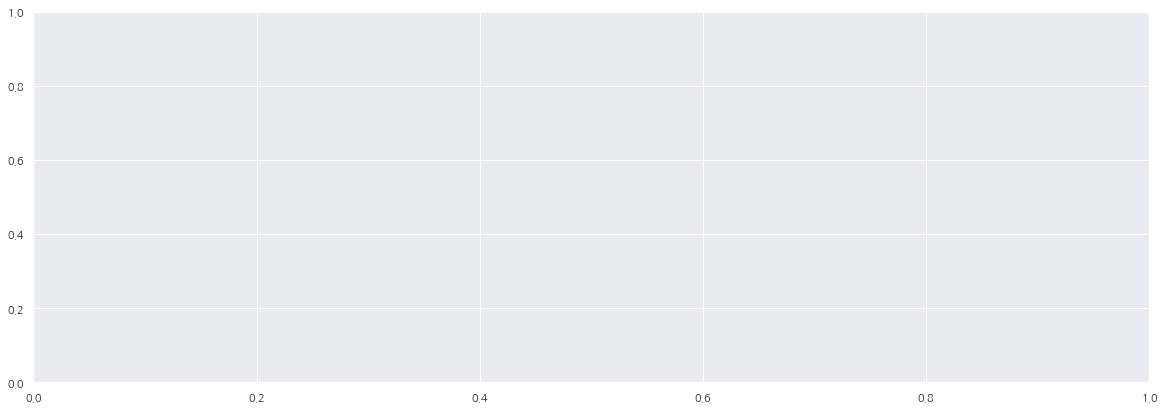

In [4]:
plt.figure(figsize=(20,15))
sns.set(font="NanumGothic", # 폰트 나눔고딕
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 방지
        style='darkgrid') # 검은 그리드

plt.subplot(2,1,1)
order_1 = data5.groupby('시')['돈'].median().sort_values(ascending = False).index
sns.boxplot(x='시',y='돈',data=data5,orient='v',order= order_1)

plt.subplot(2,1,2)
plt.bar(data4['시'],data4['돈'])
plt.xlabel("경남 지역별(2021년) 아파트매매 실거래가 분포(위), 아파트매매 실거래가 평균(아래)")
plt.ylabel("주택 실거래가(만원)")
plt.show()

In [15]:
# 인구수 시각화 (피라미드, 도넛, 창원시, 전국 순으로)
pop_data1 = pd.read_csv("c://python//인구데이터_1.csv",encoding='cp949')
pop_data1.info()
pop_data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 97 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   행정구역(동읍면)별   1188 non-null   object 
 1   5세별          1188 non-null   object 
 2   항목           1188 non-null   object 
 3   단위           1188 non-null   object 
 4   2014. 01 월   1188 non-null   int64  
 5   2014. 02 월   1188 non-null   int64  
 6   2014. 03 월   1188 non-null   int64  
 7   2014. 04 월   1188 non-null   int64  
 8   2014. 05 월   1188 non-null   int64  
 9   2014. 06 월   1188 non-null   int64  
 10  2014. 07 월   1188 non-null   int64  
 11  2014. 08 월   1188 non-null   int64  
 12  2014. 09 월   1188 non-null   int64  
 13  2014. 10 월   1188 non-null   int64  
 14  2014. 11 월   1188 non-null   int64  
 15  2014. 12 월   1188 non-null   int64  
 16  2015. 01 월   1188 non-null   int64  
 17  2015. 02 월   1188 non-null   int64  
 18  2015. 03 월   1188 non-null   int64  
 19  2015. 

,행정구역(동읍면)별,5세별,항목,단위,2014. 01 월,2014. 02 월,2014. 03 월,2014. 04 월,2014. 05 월,2014. 06 월,...,2020. 12 월,2021. 01 월,2021. 02 월,2021. 03 월,2021. 04 월,2021. 05 월,2021. 06 월,2021. 07 월,2021. 08 월,Unnamed: 96
0,전국,계,총인구수,명,51156168,51171176,51185882,51202130,51218424,51233579,...,51829023,51825932,51824142,51705905,51702100,51683025,51672400,51671569,51669716,NaN
1,전국,계,남자인구수,명,25594653,25601055,25607390,25614648,25621971,25628547,...,25841029,25838512,25836561,25787390,25784538,25775853,25770033,25768310,25766031,NaN
2,전국,계,여자인구수,명,25561515,25570121,25578492,25587482,25596453,25605032,...,25987994,25987420,25987581,25918515,25917562,25907172,25902367,25903259,25903685,NaN
3,전국,0 - 4세,총인구수,명,2292653,2294309,2292367,2292574,2293566,2294360,...,1677023,1659105,1646210,1631796,1619492,1606712,1595533,1584170,1572868,NaN
4,전국,0 - 4세,남자인구수,명,1178487,1179298,1178114,1177945,1178503,1178926,...,860253,851013,844572,837299,831066,824557,818846,812867,807150,NaN


In [16]:
pop_data2 = pop_data1.T
pop_data2.head()

,0,1,2,3,4,5,6,7,8,9,...,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187
행정구역(동읍면)별,전국,전국,전국,전국,전국,전국,전국,전국,전국,전국,...,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도
5세별,계,계,계,0 - 4세,0 - 4세,0 - 4세,5 - 9세,5 - 9세,5 - 9세,10 - 14세,...,85 - 89세,90 - 94세,90 - 94세,90 - 94세,95 - 99세,95 - 99세,95 - 99세,100+,100+,100+
항목,총인구수,남자인구수,여자인구수,총인구수,남자인구수,여자인구수,총인구수,남자인구수,여자인구수,총인구수,...,여자인구수,총인구수,남자인구수,여자인구수,총인구수,남자인구수,여자인구수,총인구수,남자인구수,여자인구수
단위,명,명,명,명,명,명,명,명,명,명,...,명,명,명,명,명,명,명,명,명,명
2014. 01 월,51156168,25594653,25561515,2292653,1178487,1114166,2321477,1199029,1122448,2796231,...,3198,2596,318,2278,591,63,528,198,21,177


In [17]:
pop_data3 = pop_data1[pop_data1["항목"]=="총인구수"]
pop_data3 = pop_data3[pop_data3["5세별"]=="계"]
pop_data3

,행정구역(동읍면)별,5세별,항목,단위,2014. 01 월,2014. 02 월,2014. 03 월,2014. 04 월,2014. 05 월,2014. 06 월,...,2020. 12 월,2021. 01 월,2021. 02 월,2021. 03 월,2021. 04 월,2021. 05 월,2021. 06 월,2021. 07 월,2021. 08 월,Unnamed: 96
0,전국,계,총인구수,명,51156168,51171176,51185882,51202130,51218424,51233579,...,51829023,51825932,51824142,51705905,51702100,51683025,51672400,51671569,51669716,NaN
66,서울특별시,계,총인구수,명,10143164,10144173,10141727,10137313,10133734,10129223,...,9668465,9657969,9648606,9598484,9588711,9575355,9565990,9558153,9550227,NaN
132,부산광역시,계,총인구수,명,3526648,3527439,3525512,3523386,3521473,3521210,...,3391946,3389388,3387761,3372399,3369704,3367334,3364358,3361781,3359527,NaN
198,대구광역시,계,총인구수,명,2501823,2500778,2500874,2499880,2498632,2498450,...,2418346,2415813,2413191,2408875,2406296,2402940,2397646,2395749,2393626,NaN
264,인천광역시,계,총인구수,명,2882047,2884824,2886580,2889258,2891615,2892483,...,2942828,2942452,2941705,2936461,2936214,2936382,2936367,2937440,2938429,NaN
330,광주광역시,계,총인구수,명,1473529,1473327,1472490,1471850,1473697,1474546,...,1450062,1449115,1447953,1445473,1444787,1443154,1442647,1442482,1441970,NaN
396,대전광역시,계,총인구수,명,1533497,1534335,1534954,1535367,1535415,1535701,...,1463882,1463291,1462064,1458463,1457619,1457161,1456107,1455300,1454679,NaN
462,울산광역시,계,총인구수,명,1157199,1157627,1158245,1159234,1160275,1161019,...,1136017,1135370,1132953,1129254,1128163,1127175,1126369,1125727,1124459,NaN
528,세종특별자치시,계,총인구수,명,123802,125944,126857,128200,129669,130708,...,355831,357871,359569,360462,361396,362036,362995,364364,365309,NaN
594,경기도,계,총인구수,명,12245960,12256617,12266541,12276751,12286470,12300698,...,13427014,13449499,13471758,13465837,13479798,13488910,13500688,13512867,13530519,NaN


In [18]:
pop_data4 = pop_data3.T
pop_data4

,0,66,132,198,264,330,396,462,528,594,660,726,792,858,924,990,1056,1122
행정구역(동읍면)별,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
5세별,계,계,계,계,계,계,계,계,계,계,계,계,계,계,계,계,계,계
항목,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수,총인구수
단위,명,명,명,명,명,명,명,명,명,명,명,명,명,명,명,명,명,명
2014. 01 월,51156168,10143164,3526648,2501823,2882047,1473529,1533497,1157199,123802,12245960,1540745,1572779,2048438,1872297,1906363,2698306,3334948,594623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021. 05 월,51683025,9575355,3367334,2402940,2936382,1443154,1457161,1127175,362036,13488910,1535491,1596955,2117260,1794682,1842423,2633592,3327298,674877
2021. 06 월,51672400,9565990,3364358,2397646,2936367,1442647,1456107,1126369,362995,13500688,1535530,1597503,2117400,1794345,1840921,2632401,3325840,675293
2021. 07 월,51671569,9558153,3361781,2395749,2937440,1442482,1455300,1125727,364364,13512867,1536140,1597501,2118205,1793902,1839698,2631649,3324735,675876
2021. 08 월,51669716,9550227,3359527,2393626,2938429,1441970,1454679,1124459,365309,13530519,1536270,1597179,2118183,1792476,1838353,2630254,3322373,675883


In [19]:
pop_list = pop_data4.iloc[1:-1,10:11]
pop_list = pop_list.reset_index()
pop_list = pop_list.drop(pop_list.index[0:3])
pop_list

,index,660
3,2014. 01 월,1540745
4,2014. 02 월,1539343
5,2014. 03 월,1541051
6,2014. 04 월,1541556
7,2014. 05 월,1541841
...,...,...
90,2021. 04 월,1536175
91,2021. 05 월,1535491
92,2021. 06 월,1535530
93,2021. 07 월,1536140


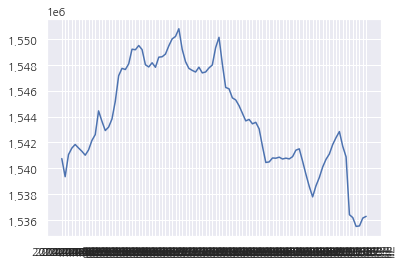

In [20]:
plt.plot(pop_list["index"],pop_list[660])


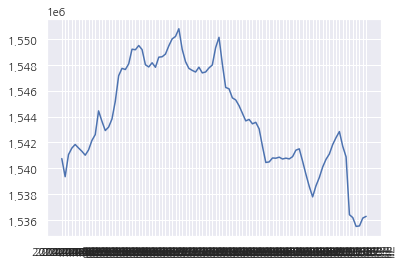

In [21]:
plt.plot(pop_list["index"],pop_list[660])


In [148]:
pop_data5 = pd.DataFrame()
pop_data6 = pd.DataFrame()
pop_data5 = pop_data1[pop_data1["행정구역(동읍면)별"] == "전국"]
pop_data6["나이"] = pop_data5["5세별"]
pop_data6["수"] = pop_data5["2014. 01 월"]
pop_data6["성별"] = pop_data5["항목"]
pop_data6


,나이,수,성별
0,계,51156168,총인구수
1,계,25594653,남자인구수
2,계,25561515,여자인구수
3,0 - 4세,2292653,총인구수
4,0 - 4세,1178487,남자인구수
...,...,...,...
61,95 - 99세,5608,남자인구수
62,95 - 99세,21412,여자인구수
63,100+,13970,총인구수
64,100+,3230,남자인구수


In [149]:
man_list = pop_data6[pop_data6["성별"] == "남자인구수"]
woman_list = pop_data6[pop_data6["성별"] == "여자인구수"]
man_list2 = pd.DataFrame()
man_list = man_list.drop(man_list.index[0])
woman_list = woman_list.drop(woman_list.index[0])
man_list2["수"] = man_list["수"].apply(lambda x: x*(-1))
man_list2["나이"] = man_list["나이"]
man_list2

,수,나이
4,-1178487,0 - 4세
7,-1199029,5 - 9세
10,-1458464,10 - 14세
13,-1794943,15 - 19세
16,-1804599,20 - 24세
19,-1644456,25 - 29세
22,-2080957,30 - 34세
25,-2001236,35 - 39세
28,-2343972,40 - 44세
31,-2206289,45 - 49세


<BarContainer object of 21 artists>

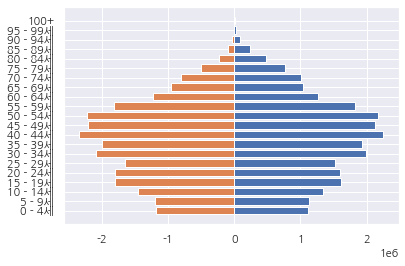

In [150]:
plt.barh(woman_list["나이"],woman_list["수"])
plt.barh(man_list2["나이"],man_list2["수"])

In [128]:
pop_data7 = pd.DataFrame()
pop_data7["지역"] = pop_data3["행정구역(동읍면)별"]
pop_data7["인구수"] = pop_data3["2014. 01 월"]
pop_data7 = pop_data7.drop(pop_data7.index[0])
pop_data7

,지역,인구수
66,서울특별시,10143164
132,부산광역시,3526648
198,대구광역시,2501823
264,인천광역시,2882047
330,광주광역시,1473529
396,대전광역시,1533497
462,울산광역시,1157199
528,세종특별자치시,123802
594,경기도,12245960
660,강원도,1540745


([<matplotlib.patches.Wedge at 0x1de1a88bc10>,
 [Text(0.8934026187486073, 0.6417411945738959, '서울특별시'),
  Text(0.11900498281105527, 1.0935436955449658, '부산광역시'),
  Text(-0.28472367661758674, 1.0625123189748737, '대구광역시'),
  Text(-0.6142382817138459, 0.9125301821184997, '인천광역시'),
  Text(-0.8335821324039682, 0.7177331179044572, '광주광역시'),
  Text(-0.95119863691361, 0.5524682372170282, '대전광역시'),
  Text(-1.0291174502148934, 0.3884807249571032, '울산광역시'),
  Text(-1.0564643351130645, 0.3064035062366465, '세종특별자치시'),
  Text(-0.9770285696194994, -0.5053861633911986, '경기도'),
  Text(-0.2686929646981201, -1.0666790007878353, '강원도'),
  Text(-0.06108005996620234, -1.0983028845789877, '충청북도'),
  Text(0.18266246369707712, -1.084727811184038, '충청남도'),
  Text(0.4360568852230951, -1.0098784049822696, '전라북도'),
  Text(0.6566178955048019, -0.8825264524663525, '전라남도'),
  Text(0.8767880906461802, -0.6642609758980469, '경상북도'),
  Text(1.0578154556932606, -0.30170591922675233, '경상남도'),
  Text(1.0992666658806276, -0.

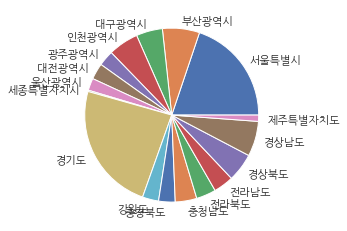

In [187]:
plt.pie(pop_data7["인구수"],labels = pop_data7["지역"])

In [31]:
pop_c_data = pd.read_excel("c://python//연령대별주거인구.xlsx")
pop_c_data.head()
#pop_c_data.info()

,기준년월,행정동코드,시도명,시군구명,행정동명,전체 주거인구,0~9세주거인구,10대주거인구,20대주거인구,30대주거인구,40대주거인구,50대주거인구,60대주거인구,70대주거인구,80세이상주거인구
0,201007,48121250,경상남도,창원시 의창구,동읍,23592,2633,3467,2628,3888,4278,3092,1836,1341,429
1,201007,48123550,경상남도,창원시 성산구,가음정동,46594,5002,8601,7155,7814,10069,5290,1505,833,325
2,201606,48129530,경상남도,창원시 진해구,충무동,4330,308,348,450,533,642,674,684,454,237
3,201007,48121310,경상남도,창원시 의창구,북면,11843,815,1337,1401,1420,1858,2090,1332,1108,482
4,201007,48125565,경상남도,창원시 마산합포구,반월중앙동,8960,719,1213,1288,1355,1468,1440,841,473,163


In [32]:
pop_c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6997 entries, 0 to 6996
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기준년월       6997 non-null   int64 
 1   행정동코드      6997 non-null   int64 
 2   시도명        6997 non-null   object
 3   시군구명       6997 non-null   object
 4   행정동명       6997 non-null   object
 5   전체 주거인구    6997 non-null   int64 
 6   0~9세주거인구   6997 non-null   int64 
 7   10대주거인구    6997 non-null   int64 
 8   20대주거인구    6997 non-null   int64 
 9   30대주거인구    6997 non-null   int64 
 10  40대주거인구    6997 non-null   int64 
 11  50대주거인구    6997 non-null   int64 
 12  60대주거인구    6997 non-null   int64 
 13  70대주거인구    6997 non-null   int64 
 14  80세이상주거인구  6997 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 820.1+ KB


In [33]:
pop_c_data2 = pop_c_data.drop(columns = ["행정동코드","시도명"])
pop_c_data2.head()

,기준년월,시군구명,행정동명,전체 주거인구,0~9세주거인구,10대주거인구,20대주거인구,30대주거인구,40대주거인구,50대주거인구,60대주거인구,70대주거인구,80세이상주거인구
0,201007,창원시 의창구,동읍,23592,2633,3467,2628,3888,4278,3092,1836,1341,429
1,201007,창원시 성산구,가음정동,46594,5002,8601,7155,7814,10069,5290,1505,833,325
2,201606,창원시 진해구,충무동,4330,308,348,450,533,642,674,684,454,237
3,201007,창원시 의창구,북면,11843,815,1337,1401,1420,1858,2090,1332,1108,482
4,201007,창원시 마산합포구,반월중앙동,8960,719,1213,1288,1355,1468,1440,841,473,163


In [39]:
pop_c_data3 = pop_c_data2.groupby("기준년월").apply(lambda x:x.sum())
pop_c_data3 = pop_c_data3.drop(columns = ["기준년월","시군구명","행정동명"])
pop_c_data3 = pop_c_data3.reset_index()
pop_c_data3["기준년월"] = pop_c_data3["기준년월"].astype(str)
pop_c_data3

,기준년월,전체 주거인구,0~9세주거인구,10대주거인구,20대주거인구,30대주거인구,40대주거인구,50대주거인구,60대주거인구,70대주거인구,80세이상주거인구
0,201007,1067382,106290,159825,152028,177402,197812,148141,72174,40105,13605
1,201008,1067740,106062,159677,151560,177328,197610,149242,72336,40234,13691
2,201009,1068198,105795,159510,151237,177127,197488,150460,72363,40397,13821
3,201010,1074999,105535,159610,151218,178057,199282,153216,73169,40750,14162
4,201011,1075382,105393,159602,150732,177870,199156,154125,73383,40905,14216
...,...,...,...,...,...,...,...,...,...,...,...
116,202003,1042260,86780,102190,132557,138260,169841,188379,134127,61351,28775
117,202004,1042351,86723,102126,132624,138238,169806,188308,134358,61439,28729
118,202005,1040773,86079,101411,132030,137557,169124,188082,135480,62000,29010
119,202006,1040118,85822,101118,131642,137263,168978,187510,136410,62309,29066


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 

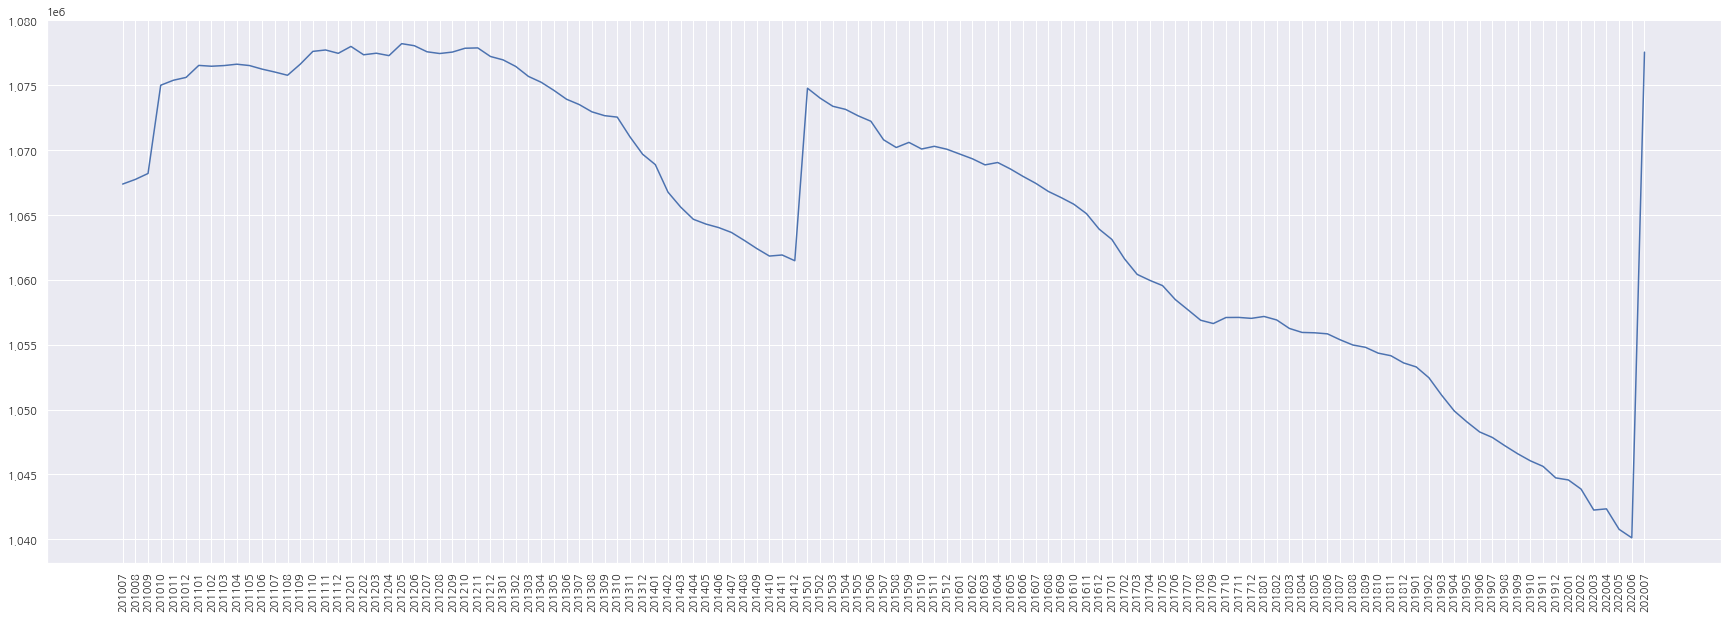

In [44]:
plt.figure(figsize=(30,10))
plt.plot(pop_c_data3["기준년월"],pop_c_data3["전체 주거인구"])
plt.xticks(rotation = 90)

In [45]:
pop_cc_data = pd.read_csv("c://python//창원시_인구데이터_5세별.csv",encoding='cp949')
pop_cc_data.head()

,행정구역(동읍면)별,5세별,항목,단위,2012. 07 월,2012. 08 월,2012. 09 월,2012. 10 월,2012. 11 월,2012. 12 월,...,2020. 12 월,2021. 01 월,2021. 02 월,2021. 03 월,2021. 04 월,2021. 05 월,2021. 06 월,2021. 07 월,2021. 08 월,Unnamed: 114
0,의창구,계,총인구수,명,255313,255254,255262,255383,255397,255394,...,262408,261845,261339,260953,260623,260346,260018,218589,218422,NaN
1,의창구,계,남자인구수,명,130253,130215,130226,130225,130243,130254,...,133544,133265,133019,132831,132638,132480,132314,111364,111226,NaN
2,의창구,계,여자인구수,명,125060,125039,125036,125158,125154,125140,...,128864,128580,128320,128122,127985,127866,127704,107225,107196,NaN
3,의창구,0 - 4세,총인구수,명,11225,11206,11177,11177,11175,11150,...,9387,9235,9125,9020,8940,8901,8850,7327,7226,NaN
4,의창구,0 - 4세,남자인구수,명,5778,5768,5747,5766,5770,5771,...,4812,4725,4664,4622,4600,4574,4555,3785,3727,NaN


In [53]:
pop_cc_data2 = pop_cc_data[pop_cc_data["5세별"] == "계"]
pop_cc_data2 = pop_cc_data2[pop_cc_data2["항목"] == "총인구수"]
pop_cc_data2 = pop_cc_data2.drop(columns = "Unnamed: 114")
pop_cc_data2

,행정구역(동읍면)별,5세별,항목,단위,2012. 07 월,2012. 08 월,2012. 09 월,2012. 10 월,2012. 11 월,2012. 12 월,...,2020. 11 월,2020. 12 월,2021. 01 월,2021. 02 월,2021. 03 월,2021. 04 월,2021. 05 월,2021. 06 월,2021. 07 월,2021. 08 월
0,의창구,계,총인구수,명,255313,255254,255262,255383,255397,255394,...,262743,262408,261845,261339,260953,260623,260346,260018,218589,218422
66,성산구,계,총인구수,명,246995,246985,247023,247120,247067,246801,...,215143,214570,214067,213520,212926,212662,212396,212180,253362,252996
132,마산합포구,계,총인구수,명,185999,185913,185921,185768,185711,185505,...,174933,175716,176636,177905,178773,179434,179657,180374,180600,180795
198,마산회원구,계,총인구수,명,222057,221908,221887,221842,221697,221388,...,191730,191289,190739,190068,189593,189134,188784,188525,188322,187941
264,진해구,계,총인구수,명,181528,181720,181780,182013,182274,182383,...,192612,192755,192916,192742,192732,192852,192947,193430,193762,193996


In [55]:
pop_cc_data3 = pop_cc_data2.groupby("단위").apply(lambda x:x.sum())
pop_cc_data3 = pop_cc_data3.drop(columns = ["행정구역(동읍면)별","5세별","항목","단위"])
pop_cc_data3

,2012. 07 월,2012. 08 월,2012. 09 월,2012. 10 월,2012. 11 월,2012. 12 월,2013. 01 월,2013. 02 월,2013. 03 월,2013. 04 월,...,2020. 11 월,2020. 12 월,2021. 01 월,2021. 02 월,2021. 03 월,2021. 04 월,2021. 05 월,2021. 06 월,2021. 07 월,2021. 08 월
단위,,,,,,,,,,,,,,,,,,,,,
명,1091892,1091780,1091873,1092126,1092146,1091471,1091188,1090687,1089899,1089406,...,1037161,1036738,1036203,1035574,1034977,1034705,1034130,1034527,1034635,1034150


In [57]:
pop_cc_data4 = pop_cc_data3.T
pop_cc_data4 = pop_cc_data4.reset_index()
pop_cc_data4

단위,index,명
0,2012. 07 월,1091892
1,2012. 08 월,1091780
2,2012. 09 월,1091873
3,2012. 10 월,1092126
4,2012. 11 월,1092146
...,...,...
105,2021. 04 월,1034705
106,2021. 05 월,1034130
107,2021. 06 월,1034527
108,2021. 07 월,1034635


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''

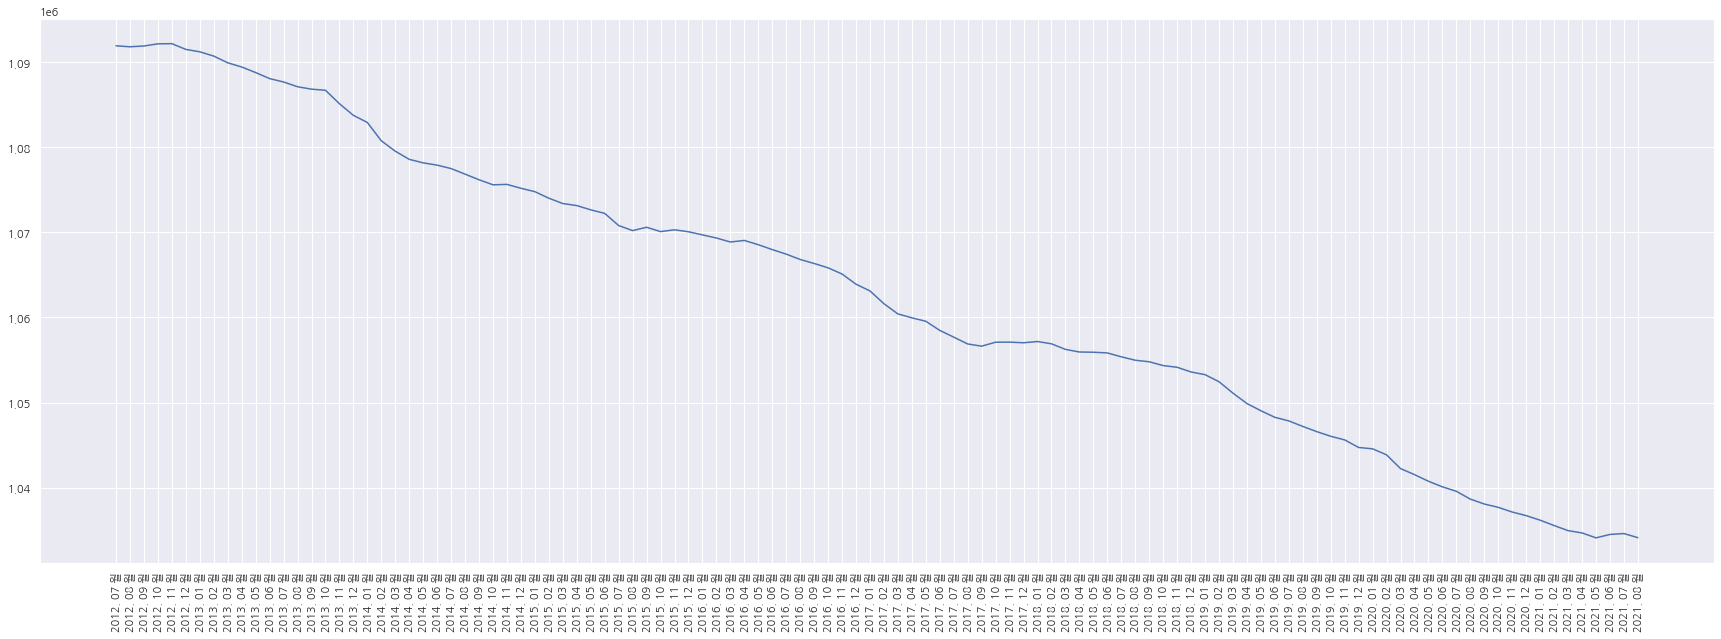

In [63]:
plt.figure(figsize = (30,10))
plt.plot(pop_cc_data4["index"],pop_cc_data4["명"])
plt.xticks(rotation = 90)

In [82]:
pop_cc_data5 = pd.DataFrame()
pop_cc_data5["날짜"] = pop_cc_data4["index"]
pop_lst = []
j = pop_cc_data4["명"][0]
print(j)
for i in pop_cc_data4["명"]:
    k = i - j
    j = i
    pop_lst.append(k)
pop_cc_data5["증감"] = pop_lst
pop_cc_data5

1091892


,날짜,증감
0,2012. 07 월,0
1,2012. 08 월,-112
2,2012. 09 월,93
3,2012. 10 월,253
4,2012. 11 월,20
...,...,...
105,2021. 04 월,-272
106,2021. 05 월,-575
107,2021. 06 월,397
108,2021. 07 월,108


<BarContainer object of 110 artists>

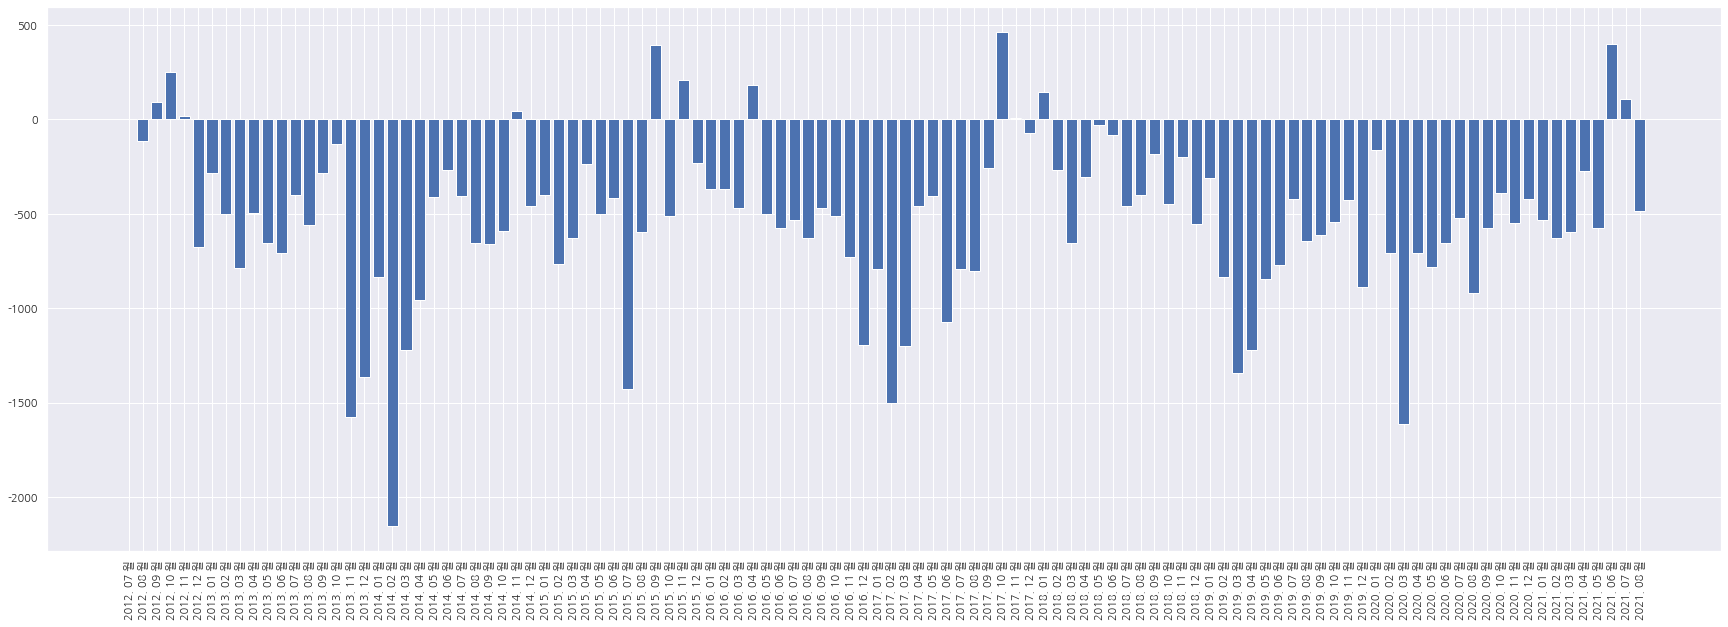

In [83]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90)
plt.bar(pop_cc_data5["날짜"],pop_cc_data5["증감"])

In [91]:
pop_cc_man = pop_cc_data[pop_cc_data["항목"]=="남자인구수"]
pop_cc_man = pop_cc_man.groupby("5세별").apply(lambda x:x.sum())
pop_cc_man = pop_cc_man.drop(columns = ["행정구역(동읍면)별","5세별","항목","단위"])
pop_cc_man

pop_cc_woman = pop_cc_data[pop_cc_data["항목"]=="여자인구수"]
pop_cc_woman = pop_cc_woman.groupby("5세별").apply(lambda x:x.sum())
pop_cc_woman = pop_cc_woman.drop(columns = ["행정구역(동읍면)별","5세별","항목","단위"])
pop_cc_woman

,2012. 07 월,2012. 08 월,2012. 09 월,2012. 10 월,2012. 11 월,2012. 12 월,2013. 01 월,2013. 02 월,2013. 03 월,2013. 04 월,...,2020. 12 월,2021. 01 월,2021. 02 월,2021. 03 월,2021. 04 월,2021. 05 월,2021. 06 월,2021. 07 월,2021. 08 월,Unnamed: 114
5세별,,,,,,,,,,,,,,,,,,,,,
0 - 4세,25928,25925,25876,25903,25845,25808,25725,25830,25676,25622,...,16712,16508,16359,16176,16041,15959,15862,15769,15654,0.0
10 - 14세,32401,32197,32028,31847,31660,31386,31146,30832,30652,30503,...,23611,23673,23666,23776,23879,23889,24000,24054,24106,0.0
100+,81,84,83,83,82,83,85,84,84,85,...,145,149,149,125,124,82,74,74,73,0.0
15 - 19세,37783,37768,37662,37682,37661,37521,37449,37263,37107,37001,...,23877,23720,23538,23231,23098,23020,22933,22877,22805,0.0
20 - 24세,33504,33589,33692,33729,33761,33852,33886,33783,33833,34000,...,28538,28454,28262,28061,27942,27880,27782,27642,27478,0.0
25 - 29세,34014,33769,33624,33417,33196,32820,32526,32280,32157,32010,...,29072,28974,28839,28784,28758,28742,28734,28742,28657,0.0
30 - 34세,43172,43237,43244,43272,43219,43021,43084,43200,43036,43032,...,27327,27338,27307,27427,27500,27529,27601,27640,27676,0.0
35 - 39세,42920,42726,42592,42472,42511,42463,42184,41986,41790,41474,...,35790,35586,35317,35115,34887,34665,34443,34230,34019,0.0
40 - 44세,50799,50755,50675,50652,50470,50401,50377,50222,49940,49936,...,38782,38694,38804,38772,38802,38928,39219,39521,39636,0.0


In [129]:
j = 0
order = []
for i in pop_cc_data["5세별"]:
    j += 1
    if j % 3 == 0:
        order.append(i)
    if len(order) == 22:
        break
print(order)

pop_cc_man_f = pop_cc_man["2014. 01 월"]
pop_cc_man_f = pop_cc_man_f.reindex(index = order)
pop_cc_man_f = pop_cc_man_f.reset_index()
pop_cc_man_f = pop_cc_man_f.drop(pop_cc_man_f.index[0])


pop_cc_woman_f = pop_cc_woman["2014. 01 월"]
pop_cc_woman_f = pop_cc_woman_f.reindex(index = order)
pop_cc_woman_f = pop_cc_woman_f.reset_index()
pop_cc_woman_f = pop_cc_woman_f.drop(pop_cc_woman_f.index[0])

pop_cc_man_l = pop_cc_man["2021. 08 월"]
pop_cc_man_l = pop_cc_man_l.reindex(index = order)
pop_cc_man_l = pop_cc_man_l.reset_index()
pop_cc_man_l = pop_cc_man_l.drop(pop_cc_man_l.index[0])

pop_cc_woman_l = pop_cc_woman["2021. 08 월"]
pop_cc_woman_l = pop_cc_woman_l.reindex(index = order)
pop_cc_woman_l = pop_cc_woman_l.reset_index()
pop_cc_woman_l = pop_cc_woman_l.drop(pop_cc_woman_l.index[0])

pop_cc_woman_l

['계', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세', '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세', '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세', '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100+']


,5세별,2021. 08 월
1,0 - 4세,15654
2,5 - 9세,23305
3,10 - 14세,24106
4,15 - 19세,22805
5,20 - 24세,27478
6,25 - 29세,28657
7,30 - 34세,27676
8,35 - 39세,34019
9,40 - 44세,39636
10,45 - 49세,42190


In [96]:
j = 0
order = []
for i in pop_cc_data["5세별"]:
    j += 1
    if j % 3 == 0:
        order.append(i)
    if len(order) == 22:
        break
print(order)

['계', '0 - 4세', '5 - 9세', '10 - 14세', '15 - 19세', '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세', '40 - 44세', '45 - 49세', '50 - 54세', '55 - 59세', '60 - 64세', '65 - 69세', '70 - 74세', '75 - 79세', '80 - 84세', '85 - 89세', '90 - 94세', '95 - 99세', '100+']


<BarContainer object of 21 artists>

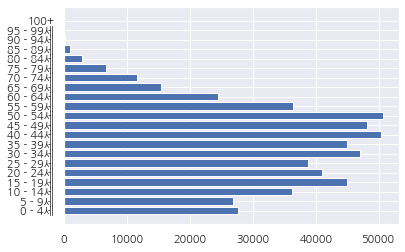

In [114]:
plt.barh(pop_cc_man_f["5세별"],pop_cc_man_f["2012. 07 월"])

In [152]:
pop_cc_man_f["2014. 01 월"] = pop_cc_man_f["2014. 01 월"].apply(lambda x: x*(-1))
pop_cc_man_l["2021. 08 월"] = pop_cc_man_l["2021. 08 월"].apply(lambda x: x*(-1))
pop_cc_man_l

,5세별,2021. 08 월
1,0 - 4세,16534
2,5 - 9세,25000
3,10 - 14세,25689
4,15 - 19세,25717
5,20 - 24세,34664
6,25 - 29세,36492
7,30 - 34세,32342
8,35 - 39세,37220
9,40 - 44세,42091
10,45 - 49세,42899


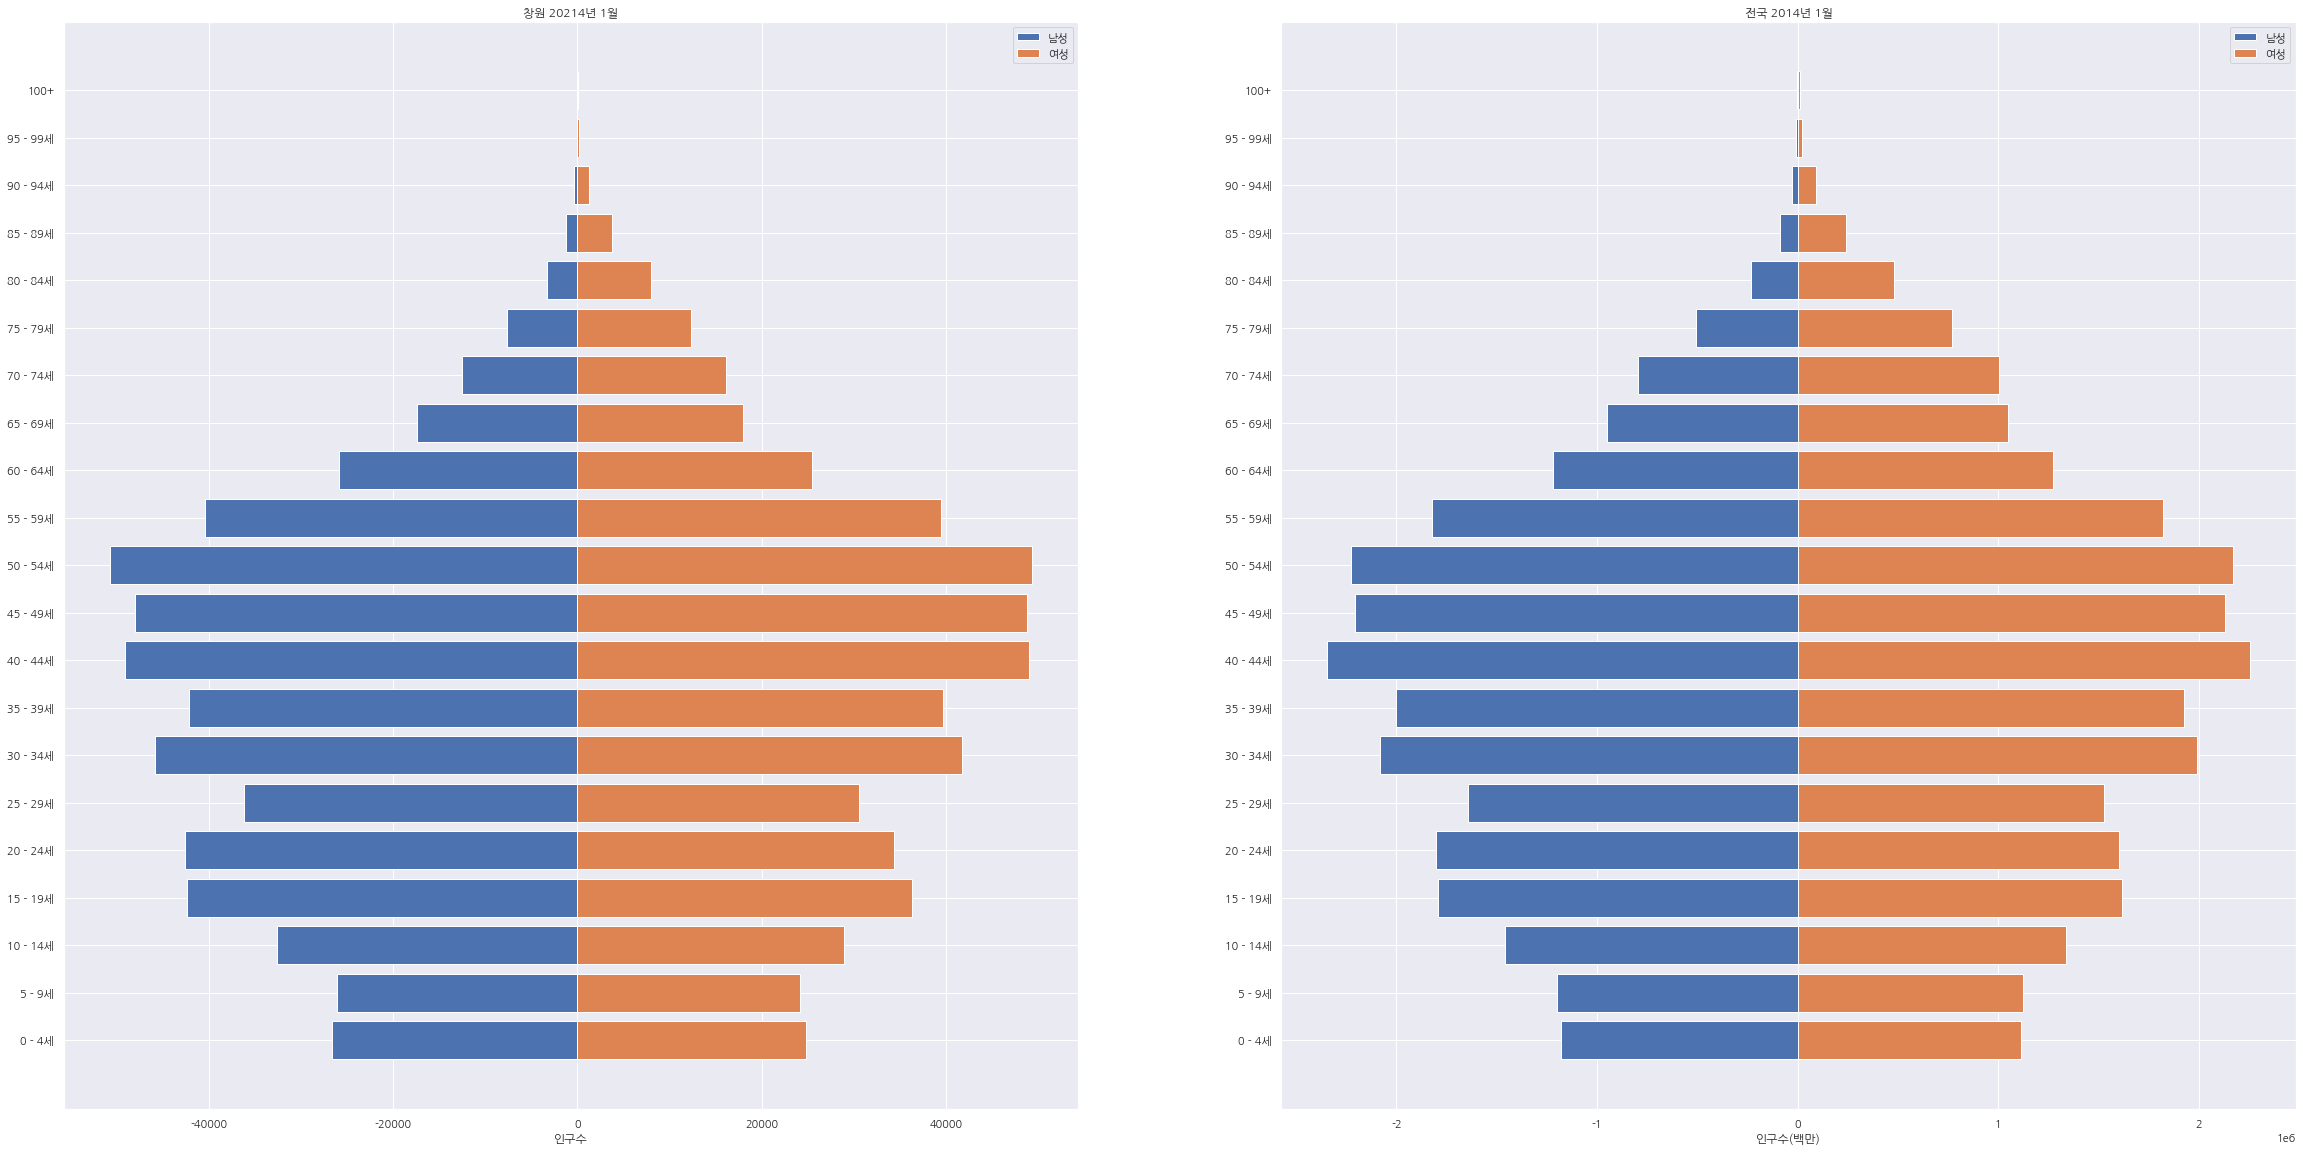

In [153]:
plt.figure(figsize = (40,20))

plt.subplot(1,2,1)
plt.title("창원 20214년 1월")
plt.barh(pop_cc_man_f["5세별"],pop_cc_man_f["2014. 01 월"],label = "남성")
plt.barh(pop_cc_woman_f["5세별"],pop_cc_woman_f["2014. 01 월"],label = "여성")
plt.legend()
plt.xlabel("인구수")

plt.subplot(1,2,2)
plt.xlabel("인구수(백만)")
plt.title("전국 2014년 1월")
plt.barh(man_list2["나이"],man_list2["수"],label = "남성")
plt.barh(woman_list["나이"],woman_list["수"],label = "여성")
plt.legend()

In [6]:
data_r1 = pd.DataFrame()
data_r1["위치"] = data1["도로명"]
data_rc1 = data1.drop(columns=["번지","본번","부번","단지명","층","건축년도","해제사유발생일"])
data_rc1

,시군구,전용면적(㎡),계약년월,계약일,거래금액(만원),도로명
0,경상남도 거제시 거제면 동상리,81.2350,202107,14,"8,000",동상명진길 8
1,경상남도 거제시 거제면 서정리,84.8000,202102,1,"14,000",읍내로13길 50-1
2,경상남도 거제시 거제면 서정리,72.5102,202108,30,"19,000",거제남서로 3466
3,경상남도 거제시 거제면 옥산리,84.9604,202101,26,"23,825",두동로 259-90
4,경상남도 거제시 거제면 옥산리,84.9435,202101,28,"24,043",두동로 259-90
...,...,...,...,...,...,...
38809,경상남도 합천군 합천읍 합천리,58.1700,202106,15,"6,500",남정길 9
38810,경상남도 합천군 합천읍 합천리,56.8200,202101,21,"5,200",중앙로 13-4
38811,경상남도 합천군 합천읍 합천리,59.5500,202102,22,"5,800",중앙로 13-4
38812,경상남도 합천군 합천읍 합천리,56.8200,202107,7,"5,300",중앙로 13-4


In [8]:
dali = [] #시군구에서 시에 대한 정보만 추출
for da in data_rc1["시군구"]:
    dali.append(da.split(" ")[1]) #0 : 도 , 1 : 시
data_rc1["시"] = dali #시군구는 놔두고 시를 새로 생성

cha = [] # 창원시는 여러개의 구로 나누어진 형태로 이를 창원시로 병합
for i in data_rc1["시"]:
    if i[0:2] == "창원":
        cha.append("창원시")
    else:
        cha.append(i)
data_rc1["시"] = cha
data_rc1

,시군구,전용면적(㎡),계약년월,계약일,거래금액(만원),도로명,시
0,경상남도 거제시 거제면 동상리,81.2350,202107,14,"8,000",동상명진길 8,거제시
1,경상남도 거제시 거제면 서정리,84.8000,202102,1,"14,000",읍내로13길 50-1,거제시
2,경상남도 거제시 거제면 서정리,72.5102,202108,30,"19,000",거제남서로 3466,거제시
3,경상남도 거제시 거제면 옥산리,84.9604,202101,26,"23,825",두동로 259-90,거제시
4,경상남도 거제시 거제면 옥산리,84.9435,202101,28,"24,043",두동로 259-90,거제시
...,...,...,...,...,...,...,...
38809,경상남도 합천군 합천읍 합천리,58.1700,202106,15,"6,500",남정길 9,합천군
38810,경상남도 합천군 합천읍 합천리,56.8200,202101,21,"5,200",중앙로 13-4,합천군
38811,경상남도 합천군 합천읍 합천리,59.5500,202102,22,"5,800",중앙로 13-4,합천군
38812,경상남도 합천군 합천읍 합천리,56.8200,202107,7,"5,300",중앙로 13-4,합천군


In [9]:
data_rc2 = data_rc1[data_rc1["시"]=="창원시"]
data_rc2

,시군구,전용면적(㎡),계약년월,계약일,거래금액(만원),도로명,시
26128,경상남도 창원마산합포구 가포동,84.6900,202105,7,"6,200",가포로 176-45,창원시
26129,경상남도 창원마산합포구 가포동,97.7500,202105,28,"10,000",가포로 176-45,창원시
26130,경상남도 창원마산합포구 가포동,84.5200,202106,5,"8,000",가포로 176-45,창원시
26131,경상남도 창원마산합포구 가포동,84.5200,202106,5,"8,000",가포로 176-45,창원시
26132,경상남도 창원마산합포구 가포동,84.6900,202106,18,"8,000",가포로 176-45,창원시
...,...,...,...,...,...,...,...
36856,경상남도 창원진해구 화천동,84.4780,202103,26,"16,000",중원로85번길 23,창원시
36857,경상남도 창원진해구 화천동,82.8000,202104,20,"13,700",중원로85번길 16-1,창원시
36858,경상남도 창원진해구 화천동,78.9171,202104,7,"16,800",중원로85번길 14,창원시
36859,경상남도 창원진해구 화천동,71.2085,202102,2,"13,000",중원로85번길 21,창원시


In [11]:
for i in data_rc2["시군구"]:
    print(i)

시군구
전용면적(㎡)
계약년월
계약일
거래금액(만원)
도로명
시


In [50]:
ttt = pd.DataFrame()
ttt["name"] = data_rc2["시군구"]
ttt["address"] = data_rc2["도로명"]
ttt

,name,address
26128,경상남도 창원마산합포구 가포동,가포로 176-45
26129,경상남도 창원마산합포구 가포동,가포로 176-45
26130,경상남도 창원마산합포구 가포동,가포로 176-45
26131,경상남도 창원마산합포구 가포동,가포로 176-45
26132,경상남도 창원마산합포구 가포동,가포로 176-45
...,...,...
36856,경상남도 창원진해구 화천동,중원로85번길 23
36857,경상남도 창원진해구 화천동,중원로85번길 16-1
36858,경상남도 창원진해구 화천동,중원로85번길 14
36859,경상남도 창원진해구 화천동,중원로85번길 21


In [43]:
url = 'http://api.vworld.kr/req/address?'
params = 'service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type='
road_type = 'PARCEL'
address = '&address='
keys = '&key='
primary_key = '60A4BC07-FE86-3533-8F52-FFCE3A071709'
geocode = pd.DataFrame(columns = ['name','address', 'x', 'y'])

In [40]:
def request_geo(road):
    page = requests.get(url+params+address+road+keys+primary_key)
    json_data = page.json()
    return json_data

In [33]:
def extraction_geo(test_data):
    geocode = pd.DataFrame(columns = ['name','address', 'x', 'y'])
    none = None

    json_data = request_geo(road)

    x = json_data['response']['result']['point']['x']
    y = json_data['response']['result']['point']['y']

    geocode = geocode.append(
        pd.DataFrame({'name':name,
                'address':road,
                'x':float(x),
                'y':float(y)},
                index=[idx]))
    return geocode

In [51]:
import json
import pandas as pd
import requests
from tqdm import tqdm
import numpy as np

index = np.arange(5)

test_data = ttt

url = 'http://api.vworld.kr/req/address?'
params = 'service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type='
road_type = 'PARCEL'
address = '&address='
keys = '&key='
primary_key = '60A4BC07-FE86-3533-8F52-FFCE3A071709'

def request_geo(road):
    page = requests.get(url+params+road_type+address+road+keys+primary_key)
    json_data = page.json()
    return json_data

def extraction_geo(test_data):
    geocode = pd.DataFrame(columns = ['name','address', 'x', 'y'])
    none = None
    for idx, road in tqdm(zip(test_data.index ,test_data['address'])):
        name = str(test_data['name'][idx])
        if len(str(road)) <= 5:
            geocode = geocode.append(
                    pd.DataFrame({'name':name,
                    'address':road,
                    'x':none,
                    'y':none},
                    index=[idx]))
            continue

        json_data = request_geo(road)

        if json_data['response']['status'] == 'NOT_FOUND' or json_data['response']['status'] == 'ERROR':
            geocode = geocode.append(
                    pd.DataFrame({'name':name,
                    'address':road,
                    'x':none,
                    'y':none},
                    index=[idx]))
            continue

        x = json_data['response']['result']['point']['x']
        y = json_data['response']['result']['point']['y']

        geocode = geocode.append(
            pd.DataFrame({'name':name,
                    'address':road,
                    'x':float(x),
                    'y':float(y)},
                    index=[idx]))
    return geocode

result = extraction_geo(test_data)
result

10733it [11:52, 15.06it/s] 


,name,address,x,y
26128,경상남도 창원마산합포구 가포동,가포로 176-45,NaN,NaN
26129,경상남도 창원마산합포구 가포동,가포로 176-45,NaN,NaN
26130,경상남도 창원마산합포구 가포동,가포로 176-45,NaN,NaN
26131,경상남도 창원마산합포구 가포동,가포로 176-45,NaN,NaN
26132,경상남도 창원마산합포구 가포동,가포로 176-45,NaN,NaN
...,...,...,...,...
36856,경상남도 창원진해구 화천동,중원로85번길 23,NaN,NaN
36857,경상남도 창원진해구 화천동,중원로85번길 16-1,NaN,NaN
36858,경상남도 창원진해구 화천동,중원로85번길 14,NaN,NaN
36859,경상남도 창원진해구 화천동,중원로85번길 21,NaN,NaN


In [47]:
road = "제주시 이도이동 1176-1"
dt = request_geo(road)
x = dt['response']['result']['point']['x']
y = dt['response']['result']['point']['y']

KeyError: 'result'

In [59]:
univa = pd.read_csv("c://python//대학_개황.csv",encoding='cp949')
univb = pd.read_csv("c://python//전문대학_개황.csv",encoding='cp949')
univa

,시도별(1),설립주체별(1),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11,2020.12
0,시도별(1),설립주체별(1),학교수 (개),재적학생수 (명),재적학생수 (명),재적학생수 (명),재적학생수 (명),재적학생수 (명),재적학생수 (명),재적학생수 (명),...,재적학생수 (명),재적학생수 (명),재적학생수 (명),재적학생수 (명),재적학생수 (명),재적학생수 (명),입학자수 (명),입학자수 (명),졸업자수 (명),졸업자수 (명)
1,시도별(1),설립주체별(1),소계,소계,여자,1학년,2학년,3학년,4학년,5학년,...,1학년,2학년,3학년,4학년,5학년,6학년,소계,여자,소계,여자
2,총계,계,183,2065451,802075,496133,603845,459046,503309,3118,...,439105,547432,473793,496672,5489,1867,342699,167792,324004,162510
3,총계,국립,28,412923,137948,94321,127576,88773,101573,680,...,95603,124337,104534,112543,1477,520,74365,31267,73321,31665
4,총계,공립,2,29023,9353,6245,9714,6104,6901,59,...,2441,3080,2977,3926,68,NaN,1822,729,1937,680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,경남,사립,5,47051,16305,12481,15471,9258,9777,64,...,9048,12957,8844,9568,101,36,7093,3062,7224,3716
70,제주,계,2,16798,5942,3668,5357,3588,4165,20,...,3071,4429,3704,4423,36,NaN,2462,1216,2439,1317
71,제주,국립,1,15871,5740,3478,5103,3324,3946,20,...,2815,3956,3280,4090,36,NaN,2296,1186,2143,1195
72,제주,공립,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
univa2 = univa[univa["설립주체별(1)"] == "계"]
univb2 = univb[univb["설립주체별(1)"] == "계"]
univb2

,시도별(1),설립주체별(1),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11
2,총계,계,147,776738,310247,379737,341290,47904,7807,249693,...,267409,240669,278417,67517,12724,22182,188533,100031,168157,89696
6,서울,계,10,64142,32720,26432,31254,5532,924,21197,...,30002,20352,24736,6510,489,2829,18762,12367,15974,10637
10,부산,계,9,60163,22184,34584,23437,1884,258,18615,...,17340,18978,19192,3043,742,1057,11054,6174,11038,5673
14,대구,계,7,60913,21541,32302,23983,3973,655,18842,...,20460,22225,21788,4640,1148,1683,15358,7725,13680,6658
18,인천,계,3,26773,10760,12740,12725,1306,2,7523,...,10053,8974,11154,1154,275,855,7418,4199,6580,3766
22,광주,계,7,31646,13751,15497,13182,2329,638,10823,...,10050,9719,10422,2468,948,936,7297,3597,6324,3211
26,대전,계,4,32203,11988,15157,14673,2107,266,10031,...,11064,9696,12369,2540,487,641,8102,4124,7262,3816
30,울산,계,2,12321,4403,6540,4426,1288,67,3564,...,4306,4475,4295,2150,422,215,3158,1464,2587,1352
34,세종,계,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2231,1406,1997,1049,NaN,244,1433,798,1236,742
38,경기,계,34,234484,88265,110364,107616,13514,2990,72959,...,80032,70396,92454,23878,1547,7952,60204,30684,52071,27402


In [88]:
univa3 = univa2.iloc[:,[0,1,2,14,27,39,52,65,78,91,104,117]]
univa3 = univa3.fillna(0)
univa3

,시도별(1),설립주체별(1),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,총계,계,183,189,188,189,189,189,189,191,191,191
6,서울,계,37,38,38,38,38,38,38,38,38,38
10,부산,계,12,12,12,12,12,12,12,12,12,12
14,대구,계,3,3,3,3,3,3,3,3,3,3
18,인천,계,4,3,3,3,3,3,3,3,3,3
22,광주,계,9,10,10,10,10,10,10,10,10,10
26,대전,계,10,11,11,11,11,11,11,11,11,11
30,울산,계,2,2,2,2,2,2,2,2,2,2
34,세종,계,0,0,1,1,1,1,1,2,2,2
38,경기,계,27,29,29,29,29,29,29,30,30,30


In [97]:
univb3 = univb2.iloc[:,[0,1,2,13,25,37,49,61,73,85,97,109]]
univb3 = univb3.fillna(0)
univb3

,시도별(1),설립주체별(1),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,총계,계,147,142,140,139,138,138,138,137,137,136
6,서울,계,10,9,9,9,9,9,9,9,9,9
10,부산,계,9,9,9,9,9,9,9,9,9,9
14,대구,계,7,7,7,7,7,7,7,7,7,7
18,인천,계,3,3,3,3,3,3,3,3,3,3
22,광주,계,7,6,6,6,6,6,6,6,6,6
26,대전,계,4,4,4,4,4,4,4,4,4,4
30,울산,계,2,2,2,2,2,2,2,2,2,2
34,세종,계,0,0,1,1,1,1,1,1,1,1
38,경기,계,34,33,33,32,31,31,31,31,31,31


In [107]:
univ = pd.concat([univa3,univb3])
univ_n = univ.iloc[:,2:].astype(int)
univ_n

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,183,189,188,189,189,189,189,191,191,191
6,37,38,38,38,38,38,38,38,38,38
10,12,12,12,12,12,12,12,12,12,12
14,3,3,3,3,3,3,3,3,3,3
18,4,3,3,3,3,3,3,3,3,3
22,9,10,10,10,10,10,10,10,10,10
26,10,11,11,11,11,11,11,11,11,11
30,2,2,2,2,2,2,2,2,2,2
34,0,0,1,1,1,1,1,2,2,2
38,27,29,29,29,29,29,29,30,30,30


In [112]:
univ2 = pd.DataFrame(univ_n)
univ2["지역"] = univ["시도별(1)"]
univ2 = univ2.groupby("지역").apply(lambda x:x.sum())
univ2 = univ2.drop(columns = "지역")
univ2 = univ2.reset_index()
univ2

,지역,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,강원,18,18,17,17,17,17,17,17,17,16
1,경기,61,62,62,61,60,60,60,61,61,61
2,경남,19,19,19,20,20,20,20,20,20,20
3,경북,35,36,35,34,34,34,34,33,33,33
4,광주,16,16,16,16,16,16,16,16,16,16
5,대구,10,10,10,10,10,10,10,10,10,10
6,대전,14,15,15,15,15,15,15,15,15,15
7,부산,21,21,21,21,21,21,21,21,21,21
8,서울,47,47,47,47,47,47,47,47,47,47
9,세종,0,0,2,2,2,2,2,3,3,3


In [134]:
iva = univa2.iloc[:,[0,1,10,23,35,48,61,74,87,100,113,126]]
iva = iva.fillna(0)
iva.columns = ["시도별(1)","설립주체별(1)","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
iva

,시도별(1),설립주체별(1),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,총계,계,361686,372941,365515,363655,355772,348393,343076,342841,343248,342699
6,서울,계,76527,82647,81216,83454,83446,83883,83395,83729,83541,83875
10,부산,계,36388,36197,35448,35208,33580,32956,32459,32754,32774,32459
14,대구,계,9854,9875,10720,10717,10670,10306,10200,10179,10184,10257
18,인천,계,8235,7279,7130,7072,7082,6948,6800,6965,6970,7044
22,광주,계,15235,16193,15941,15834,14748,14528,14412,14567,14628,14650
26,대전,계,19546,21053,20835,20730,20281,19542,19262,19493,19360,19212
30,울산,계,3903,3876,3855,3872,3769,3355,3321,3306,3316,3294
34,세종,계,0,0,3157,1562,3089,3077,3006,2847,2879,2863
38,경기,계,43927,44785,43920,42980,42164,41321,40680,40861,41422,41251


In [135]:
ivb = univb2.iloc[:,[0,1,9,21,33,45,57,69,81,93,105,117]]
ivb = ivb.fillna(0)
ivb.columns = ["시도별(1)","설립주체별(1)","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
ivb

,시도별(1),설립주체별(1),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,총계,계,249693,238952,227707,221750,214466,208808,200021,198110,197897,188533
6,서울,계,21197,20398,19605,19740,19157,19424,19142,18688,18690,18762
10,부산,계,18615,17481,17042,16407,15720,14977,13731,13521,13117,11054
14,대구,계,18842,18361,17641,17041,16340,16126,15784,15635,15943,15358
18,인천,계,7523,7432,7275,7669,7498,7365,7188,7440,7418,7418
22,광주,계,10823,8439,8102,8233,7934,7737,7604,7526,7441,7297
26,대전,계,10031,9887,9519,9563,9302,9247,8747,8593,8874,8102
30,울산,계,3564,3580,3203,3060,2978,2865,2851,2920,3081,3158
34,세종,계,0,0,1669,1622,1441,1503,1454,1498,1543,1433
38,경기,계,72959,73154,70808,67233,65151,63518,61247,61251,61681,60204


In [138]:
iva
iv = pd.concat([iva,ivb])
iv_n = iv.iloc[:,2:].astype(int)
iv

,시도별(1),설립주체별(1),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,총계,계,361686,372941,365515,363655,355772,348393,343076,342841,343248,342699
6,서울,계,76527,82647,81216,83454,83446,83883,83395,83729,83541,83875
10,부산,계,36388,36197,35448,35208,33580,32956,32459,32754,32774,32459
14,대구,계,9854,9875,10720,10717,10670,10306,10200,10179,10184,10257
18,인천,계,8235,7279,7130,7072,7082,6948,6800,6965,6970,7044
22,광주,계,15235,16193,15941,15834,14748,14528,14412,14567,14628,14650
26,대전,계,19546,21053,20835,20730,20281,19542,19262,19493,19360,19212
30,울산,계,3903,3876,3855,3872,3769,3355,3321,3306,3316,3294
34,세종,계,0,0,3157,1562,3089,3077,3006,2847,2879,2863
38,경기,계,43927,44785,43920,42980,42164,41321,40680,40861,41422,41251


In [139]:
iv2 = pd.DataFrame(iv_n)
iv2["지역"] = iv["시도별(1)"]
iv2 = iv2.groupby("지역").apply(lambda x:x.sum())
iv2 = iv2.drop(columns = "지역")
iv2 = iv2.reset_index()
iv2

,지역,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,강원,27603,26664,26034,25681,25194,23862,23096,22409,22224,21280
1,경기,116886,117939,114728,110213,107315,104839,101927,102112,103103,101455
2,경남,28914,27967,27032,26656,25079,24051,22783,22438,22190,21234
3,경북,49831,49173,45765,44663,43073,41877,40137,39579,39516,39112
4,광주,26058,24632,24043,24067,22682,22265,22016,22093,22069,21947
5,대구,28696,28236,28361,27758,27010,26432,25984,25814,26127,25615
6,대전,29577,30940,30354,30293,29583,28789,28009,28086,28234,27314
7,부산,55003,53678,52490,51615,49300,47933,46190,46275,45891,43513
8,서울,97724,103045,100821,103194,102603,103307,102537,102417,102231,102637
9,세종,0,0,4826,3184,4530,4580,4460,4345,4422,4296


In [166]:
iv3 = iv2.T
iv3 = iv3.reset_index()
iv3.columns = ["년도","강원","경기","경남","경북","광주","대구","대전","부산","서울","세종","울산","인천","전남","전북","제주","총계","충남","충북"]
iv3 = iv3.drop(iv3.index[0])
iv3

,년도,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,총계,충남,충북
1,2011,27603,116886,28914,49831,26058,28696,29577,55003,97724,0,7467,15758,22094,27500,6519,611379,43948,27801
2,2012,26664,117939,27967,49173,24632,28236,30940,53678,103045,0,7456,14711,21212,26163,6474,611893,45924,27679
3,2013,26034,114728,27032,45765,24043,28361,30354,52490,100821,4826,7058,14405,19799,24641,6402,593222,39389,27074
4,2014,25681,110213,26656,44663,24067,27758,30293,51615,103194,3184,6932,14741,18911,24015,6189,585405,40485,26808
5,2015,25194,107315,25079,43073,22682,27010,29583,49300,102603,4530,6747,14580,18719,24202,6313,570238,37742,25566
6,2016,23862,104839,24051,41877,22265,26432,28789,47933,103307,4580,6220,14313,18316,23543,6132,557201,36048,24694
7,2017,23096,101927,22783,40137,22016,25984,28009,46190,102537,4460,6172,13988,17541,23222,5858,543097,35278,23899
8,2018,22409,102112,22438,39579,22093,25814,28086,46275,102417,4345,6226,14405,17449,22792,6007,540951,35021,23483
9,2019,22224,103103,22190,39516,22069,26127,28234,45891,102231,4422,6397,14388,17109,22849,5983,541145,35041,23371
10,2020,21280,101455,21234,39112,21947,25615,27314,43513,102637,4296,6452,14462,16685,22605,5497,531232,34383,22745


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Text(0, 0.5, '입학인원')

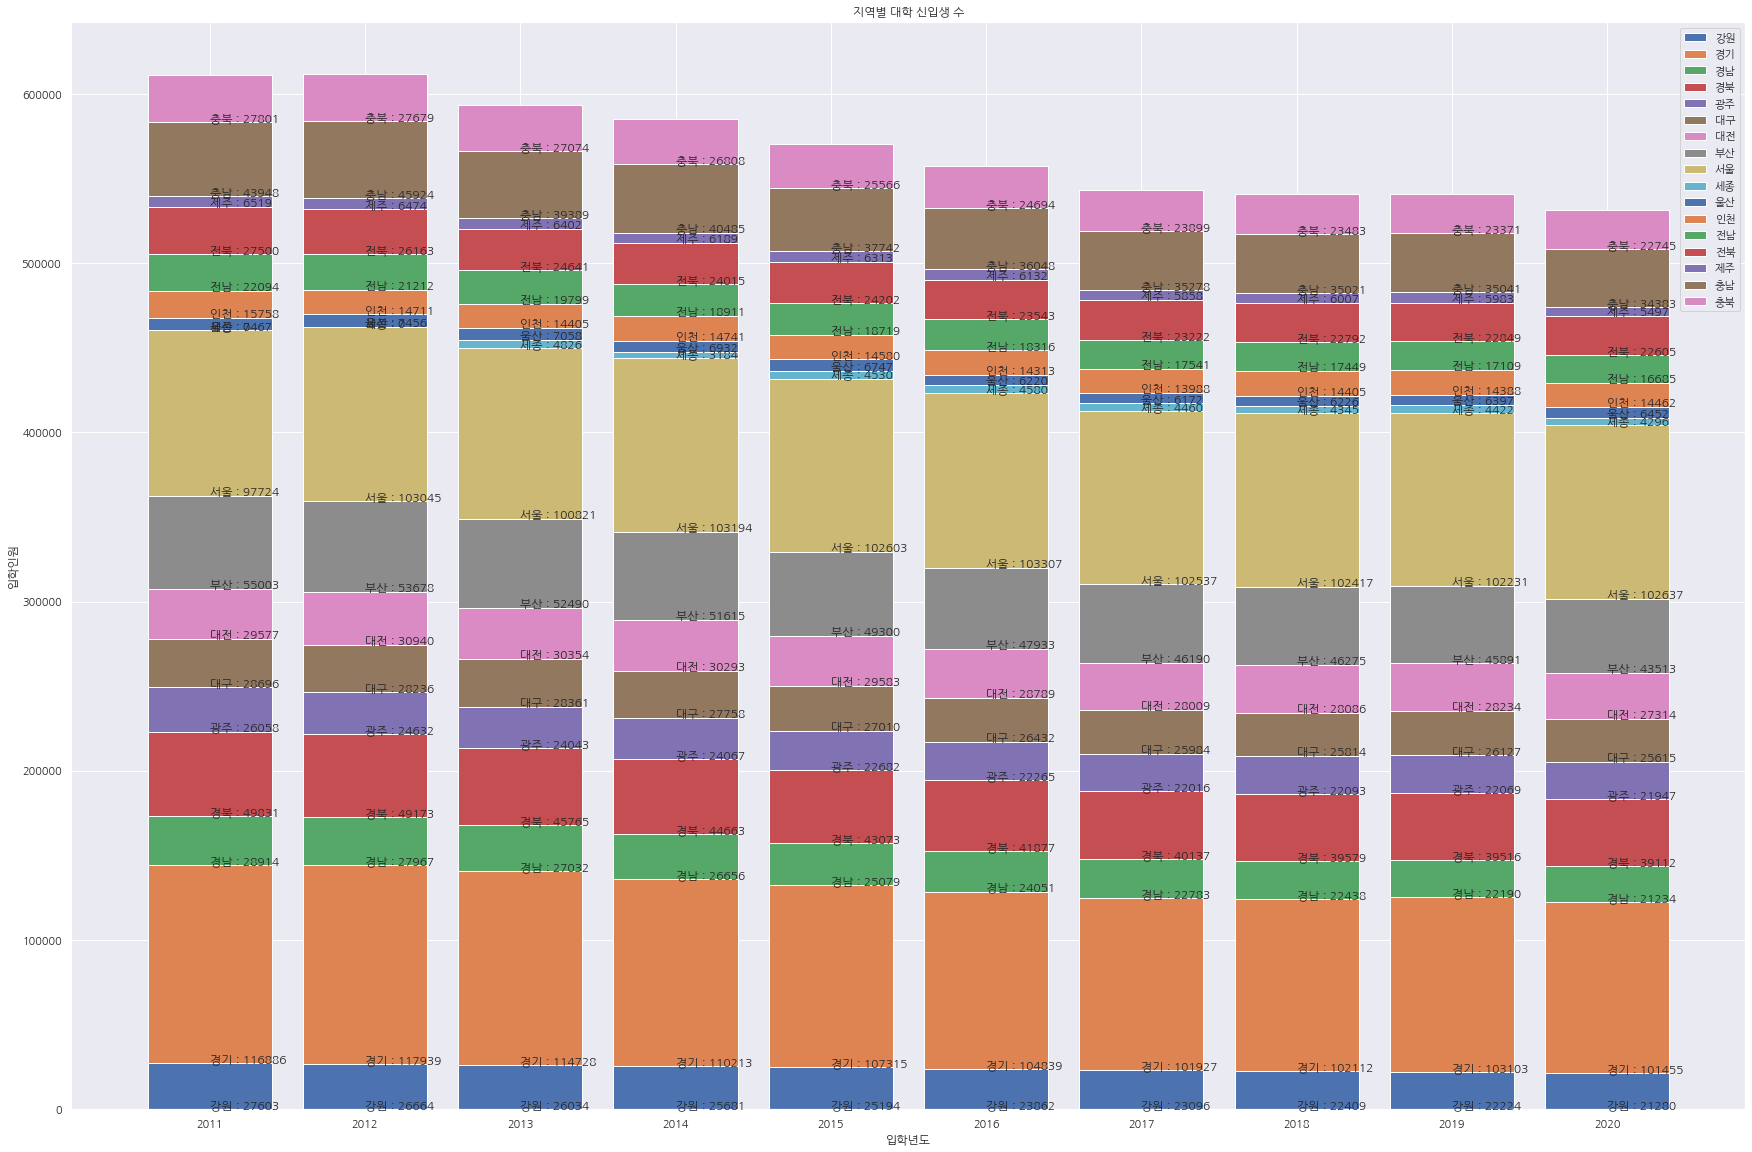

In [253]:
order_lst = ["강원","경기","경남","경북","광주","대구","대전","부산","서울","세종","울산","인천","전남","전북","제주","충남","충북"]

j = 0
bot = iv3[order_lst[0]].astype(int) - iv3[order_lst[0]].astype(int)
plt.figure(figsize = (30,20))

for i in range(0,len(order_lst)):
    print(type(bot))
    plt.bar(iv3['년도'],iv3[order_lst[i]],label = order_lst[i],bottom = bot)
    for k,v in enumerate(iv3["년도"]):
        plt.text(v,bot.iloc[k],order_lst[i]+" : "+str(iv3[order_lst[i]].iloc[k]))
    bot += iv3[order_lst[j]].astype(int)
    j += 1
plt.legend()
plt.title("지역별 대학 신입생 수")
plt.xlabel("입학년도")
plt.ylabel("입학인원")


In [221]:
plt.bar(iv3['년도'],iv3[order_lst[i]],label = order_lst[i],bottom = bot)
plt.text(iv3['년도'],iv3[order_lst[i]],"a")

Text(1     2011
2     2012
3     2013
4     2014
5     2015
6     2016
7     2017
8     2018
9     2019
10    2020
Name: 년도, dtype: object, 1     27801
2     27679
3     27074
4     26808
5     25566
6     24694
7     23899
8     23483
9     23371
10    22745
Name: 충북, dtype: object, 'a')

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 432x288 with 1 Axes>

In [226]:
iv3[order_lst[0]].iloc[0]

27603

In [243]:
tt = np.array([0,0,0,0,0])
tt

array([0, 0, 0, 0, 0])

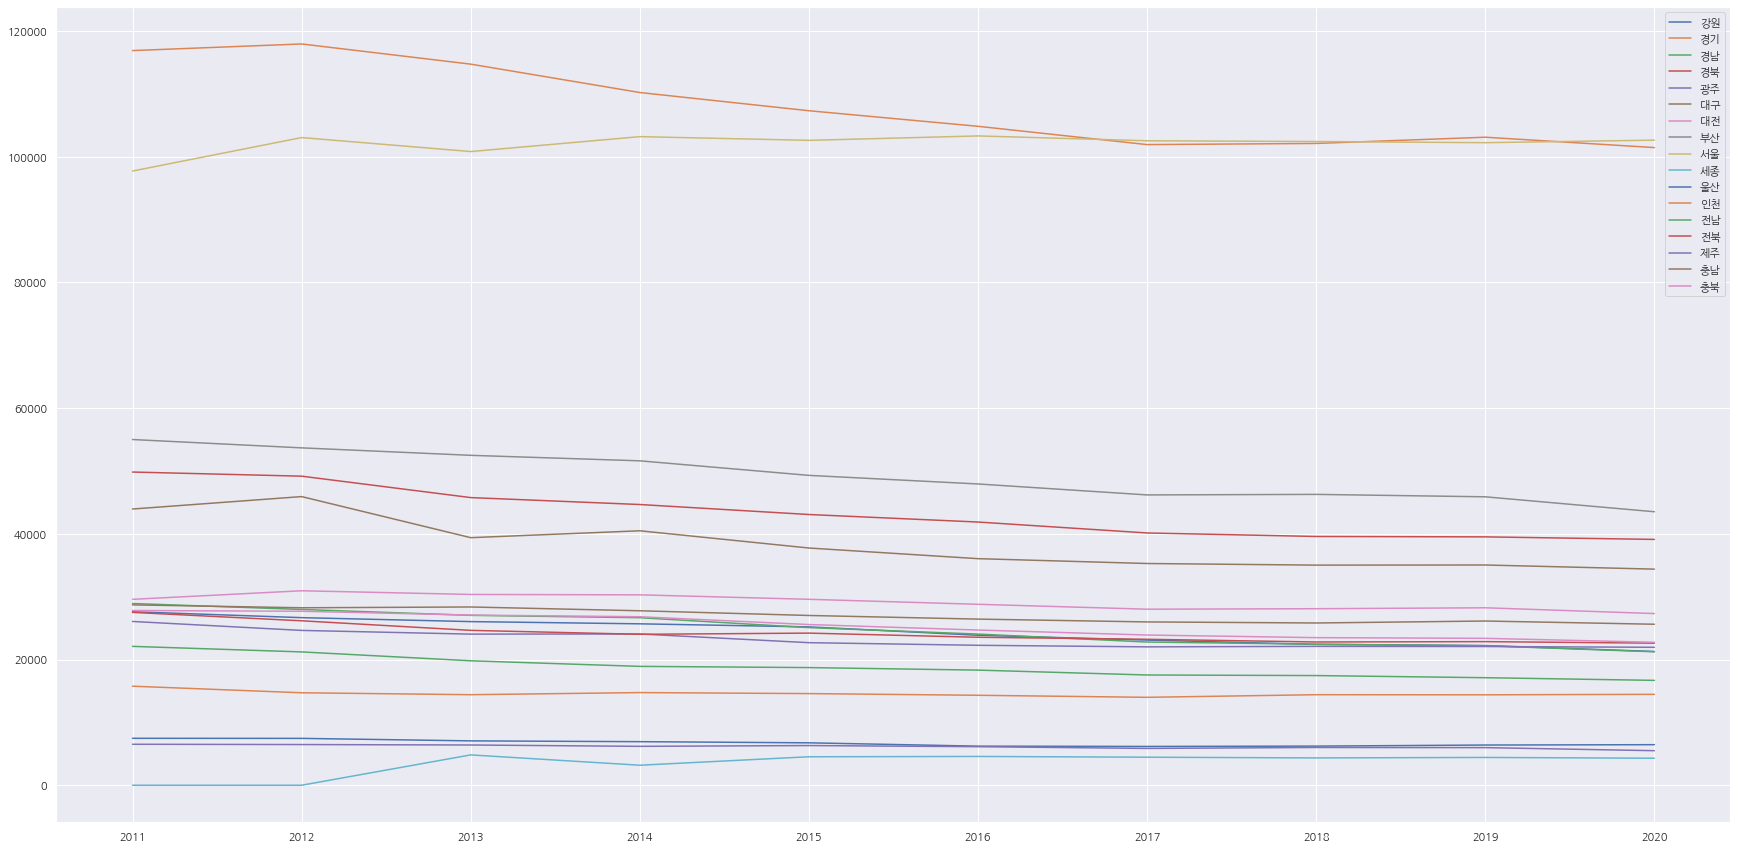

In [252]:
plt.figure(figsize = (30,15))
for i in range(0,len(order_lst)):
    plt.plot(iv3["년도"],iv3[order_lst[i]],label = order_lst[i])
plt.legend()

In [3]:
unica = pd.read_csv("c://python//대학교_개황_창원.csv",encoding='cp949')
unicb = pd.read_csv("c://python//전문대학_개황_창원.csv",encoding='cp949')
unica

,학교별(1),학교현황별(1),학교현황별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019
0,합계,학생수 (명),소계,33601,33159,32684,33470,33366,32829,32149,31200,30816
1,합계,학생수 (명),남,22826,22226,21611,21791,21389,20694,20273,19481,19451
2,합계,학생수 (명),여,10775,10933,11073,11679,11977,12135,11876,11719,11365
3,합계,입학자 현황 (명),입학지원자수,34507,30669,29682,26986,31323,30364,33319,31959,30273
4,합계,입학자 현황 (명),입학자수,5576,5344,5475,5856,5673,5611,5522,5502,5490


In [10]:
unic = pd.concat([unica,unicb])
unic = unic.drop(columns = ["학교별(1)","학교현황별(1)"])
unic = unic.groupby("학교현황별(2)").apply(lambda x: x.sum())
unic = unic.drop(columns = "학교현황별(2)")
unic

,2011,2012,2013,2014,2015,2016,2017,2018,2019
학교현황별(2),,,,,,,,,
남,32919,29656,28487,28294,27459,26175,26595,25469,25513
소계,50967,47690,46155,45907,45081,43669,43648,42139,41852
여,18048,18034,17668,17613,17622,17494,17053,16670,16339
입학자수,12521,12681,11359,11605,10914,10482,10123,10176,9814
입학지원자수,56825,59154,51796,50770,54341,53265,61492,62865,67208


In [12]:
unic2 = unic.T
unic2 = unic2.reset_index()
unic2

학교현황별(2),index,남,소계,여,입학자수,입학지원자수
0,2011,32919,50967,18048,12521,56825
1,2012,29656,47690,18034,12681,59154
2,2013,28487,46155,17668,11359,51796
3,2014,28294,45907,17613,11605,50770
4,2015,27459,45081,17622,10914,54341
5,2016,26175,43669,17494,10482,53265
6,2017,26595,43648,17053,10123,61492
7,2018,25469,42139,16670,10176,62865
8,2019,25513,41852,16339,9814,67208


Text(0, 0.5, '입학자수')

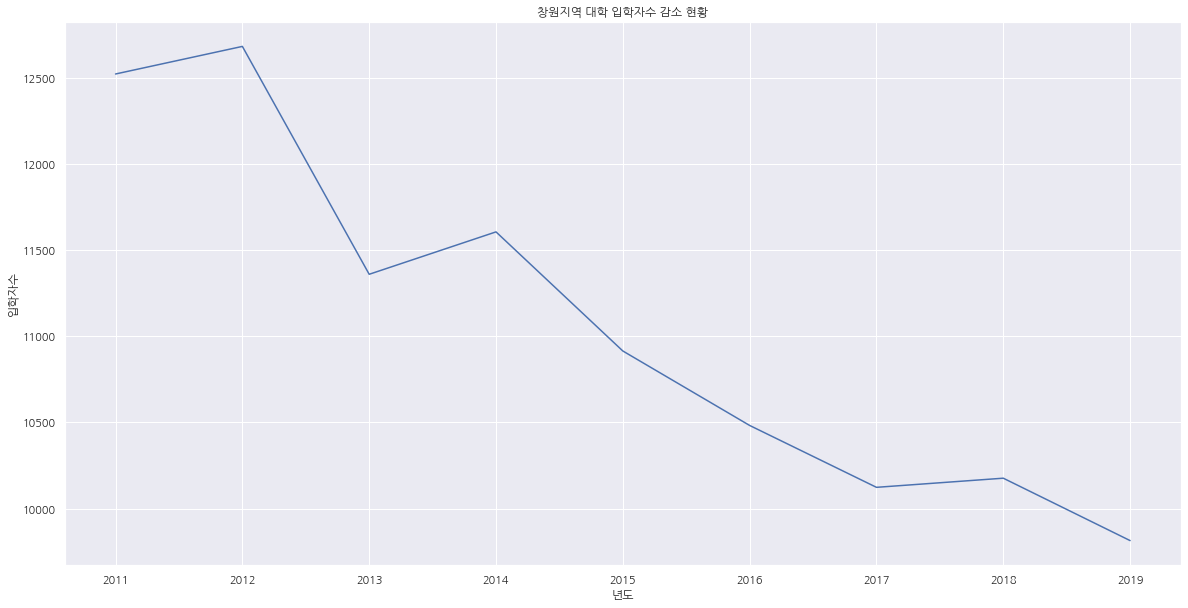

In [18]:
plt.figure(figsize = (20,10))
plt.plot(unic2["index"],unic2["입학자수"])
plt.title("창원지역 대학 입학자수 감소 현황")
plt.xlabel("년도")
plt.ylabel("입학자수")

In [52]:
indca = pd.read_csv("c://python//산업별_사업체수_및_종사자수_창원.csv",encoding='cp949')
indca

,행정구역별(1),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,...,2018.32,2018.33,2018.34,2018.35,2018.36,2018.37,2018.38,2018.39,2018.40,2018.41
0,행정구역별(1),합계,합계,합계,합계,농업임업 및 어업,농업임업 및 어업,광업,광업,제조업,...,공공행정국방 및 사회보장행정,공공행정국방 및 사회보장행정,교육서비스업,교육서비스업,보건업 및 사회복지 서비스업,보건업 및 사회복지 서비스업,예술스포츠 및 여가관련 서비스,예술스포츠 및 여가관련 서비스,협회 및 단체수리 및 기타 개인서비스업,협회 및 단체수리 및 기타 개인서비스업
1,행정구역별(1),사업체수 (개),종사자수 (명),남자종사자수 (명),여자종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),...,사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명)
2,합계,73470,407513,246139,161374,12,214,4,30,7797,...,224,13692,4397,30720,2960,38131,2437,7458,9300,18434
3,의창구,19992,100478,60570,39908,7,177,1,3,2318,...,66,7148,983,8174,695,9637,658,2486,2466,4980
4,성산구,14895,144173,100234,43939,2,12,NaN,NaN,2271,...,22,1738,1149,7175,651,7619,506,1454,1729,3834
5,마산합포구,15229,53931,27381,26550,3,25,2,24,1023,...,61,2007,745,5225,540,7679,434,1081,1937,3618
6,마산회원구,13524,65304,33770,31534,NaN,NaN,NaN,NaN,1655,...,33,1588,790,5801,538,7617,434,1240,1771,3609
7,진해구,9830,43627,24184,19443,NaN,NaN,1,3,530,...,42,1211,730,4345,536,5579,405,1197,1397,2393


In [22]:
unicpa = pd.read_csv("c://python//대학교_개황_창원_학교별.csv",encoding='cp949')
unicpb = pd.read_csv("c://python//전문대학_개황_창원_학교별.csv",encoding='cp949')
unicpb

,학교별(1),학교현황별(1),학교현황별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019
0,합계,학생수 (명),소계,17366,14531,13471.0,12437.0,11715.0,10840.0,11499.0,10939.0,11036.0
1,합계,학생수 (명),남,10093,7430,6876.0,6503.0,6070.0,5481.0,6322.0,5988.0,6062.0
2,합계,학생수 (명),여,7273,7101,6595.0,5934.0,5645.0,5359.0,5177.0,4951.0,4974.0
3,합계,입학상황 (명),입학지원자수,22318,28485,22114.0,23784.0,23018.0,22901.0,28173.0,30906.0,36935.0
4,합계,입학상황 (명),입학자수,6945,7337,5884.0,5749.0,5241.0,4871.0,4601.0,4674.0,4324.0
5,마산대학교,학생수 (명),소계,7130,6196,6282.0,6333.0,6170.0,5875.0,5679.0,5539.0,5595.0
6,마산대학교,학생수 (명),남,5044,2344,2248.0,2267.0,2204.0,2074.0,2042.0,1972.0,2004.0
7,마산대학교,학생수 (명),여,2086,3852,4034.0,4066.0,3966.0,3801.0,3637.0,3567.0,3591.0
8,마산대학교,입학상황 (명),입학지원자수,6072,12972,11153.0,12155.0,11344.0,12428.0,18848.0,18715.0,26207.0
9,마산대학교,입학상황 (명),입학자수,2500,2969,2805.0,2635.0,2524.0,2372.0,2376.0,2207.0,2280.0


In [23]:
unicpa = unicpa.fillna(0)
unicpb = unicpb.fillna(0)
unicpb

,학교별(1),학교현황별(1),학교현황별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019
0,합계,학생수 (명),소계,17366,14531,13471.0,12437.0,11715.0,10840.0,11499.0,10939.0,11036.0
1,합계,학생수 (명),남,10093,7430,6876.0,6503.0,6070.0,5481.0,6322.0,5988.0,6062.0
2,합계,학생수 (명),여,7273,7101,6595.0,5934.0,5645.0,5359.0,5177.0,4951.0,4974.0
3,합계,입학상황 (명),입학지원자수,22318,28485,22114.0,23784.0,23018.0,22901.0,28173.0,30906.0,36935.0
4,합계,입학상황 (명),입학자수,6945,7337,5884.0,5749.0,5241.0,4871.0,4601.0,4674.0,4324.0
5,마산대학교,학생수 (명),소계,7130,6196,6282.0,6333.0,6170.0,5875.0,5679.0,5539.0,5595.0
6,마산대학교,학생수 (명),남,5044,2344,2248.0,2267.0,2204.0,2074.0,2042.0,1972.0,2004.0
7,마산대학교,학생수 (명),여,2086,3852,4034.0,4066.0,3966.0,3801.0,3637.0,3567.0,3591.0
8,마산대학교,입학상황 (명),입학지원자수,6072,12972,11153.0,12155.0,11344.0,12428.0,18848.0,18715.0,26207.0
9,마산대학교,입학상황 (명),입학자수,2500,2969,2805.0,2635.0,2524.0,2372.0,2376.0,2207.0,2280.0


In [48]:
unicp = pd.concat([unicpa,unicpb])
unicp = unicp[unicp["학교현황별(2)"] == "입학자수"]
unicp = unicp.drop(columns = ["학교현황별(1)","학교현황별(2)"])
unicp

,학교별(1),2011,2012,2013,2014,2015,2016,2017,2018,2019
4,합계,5576.0,5344.0,5475.0,5856.0,5673.0,5611.0,5522.0,5502.0,5490.0
9,경남대학교,3581.0,3458.0,3391.0,3316.0,3137.0,3144.0,3060.0,3054.0,3051.0
14,창원대학교,1995.0,1886.0,2084.0,2043.0,2012.0,1964.0,1951.0,1911.0,1917.0
19,창신대학교,0.0,0.0,0.0,497.0,524.0,503.0,511.0,537.0,522.0
4,합계,6945.0,7337.0,5884.0,5749.0,5241.0,4871.0,4601.0,4674.0,4324.0
9,마산대학교,2500.0,2969.0,2805.0,2635.0,2524.0,2372.0,2376.0,2207.0,2280.0
14,창원문성대학(진해분교포함),674.0,2251.0,2352.0,2301.0,1904.0,1763.0,1413.0,1285.0,1276.0
19,한국폴리텍Ⅶ대학(창원캠퍼스),2227.0,643.0,727.0,813.0,813.0,736.0,812.0,1182.0,768.0
24,창신대학,1544.0,1474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
unicp2 = unicp.T
unicp2

,4,9,14,19,4,9,14,19,24
학교별(1),합계,경남대학교,창원대학교,창신대학교,합계,마산대학교,창원문성대학(진해분교포함),한국폴리텍Ⅶ대학(창원캠퍼스),창신대학
2011,5576.0,3581.0,1995.0,0.0,6945.0,2500.0,674.0,2227.0,1544.0
2012,5344.0,3458.0,1886.0,0.0,7337.0,2969.0,2251.0,643.0,1474.0
2013,5475.0,3391.0,2084.0,0.0,5884.0,2805.0,2352.0,727.0,0.0
2014,5856.0,3316.0,2043.0,497.0,5749.0,2635.0,2301.0,813.0,0.0
2015,5673.0,3137.0,2012.0,524.0,5241.0,2524.0,1904.0,813.0,0.0
2016,5611.0,3144.0,1964.0,503.0,4871.0,2372.0,1763.0,736.0,0.0
2017,5522.0,3060.0,1951.0,511.0,4601.0,2376.0,1413.0,812.0,0.0
2018,5502.0,3054.0,1911.0,537.0,4674.0,2207.0,1285.0,1182.0,0.0
2019,5490.0,3051.0,1917.0,522.0,4324.0,2280.0,1276.0,768.0,0.0


In [50]:
unicp2.columns = ["합계","경남대학교","창원대학교","창신대학교","합계","마산대학교","창원문성대학(진해분교포함)","한국폴리텍Ⅶ대학(창원캠퍼스)","창신대학"]
unicp2 = unicp2.drop(unicp2.index[0])
unicp2 = unicp2.drop(columns = "합계")
unicp2 = unicp2.reset_index()
unicp2

,index,경남대학교,창원대학교,창신대학교,마산대학교,창원문성대학(진해분교포함),한국폴리텍Ⅶ대학(창원캠퍼스),창신대학
0,2011,3581.0,1995.0,0.0,2500.0,674.0,2227.0,1544.0
1,2012,3458.0,1886.0,0.0,2969.0,2251.0,643.0,1474.0
2,2013,3391.0,2084.0,0.0,2805.0,2352.0,727.0,0.0
3,2014,3316.0,2043.0,497.0,2635.0,2301.0,813.0,0.0
4,2015,3137.0,2012.0,524.0,2524.0,1904.0,813.0,0.0
5,2016,3144.0,1964.0,503.0,2372.0,1763.0,736.0,0.0
6,2017,3060.0,1951.0,511.0,2376.0,1413.0,812.0,0.0
7,2018,3054.0,1911.0,537.0,2207.0,1285.0,1182.0,0.0
8,2019,3051.0,1917.0,522.0,2280.0,1276.0,768.0,0.0


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Text(0, 0.5, '입학인원')

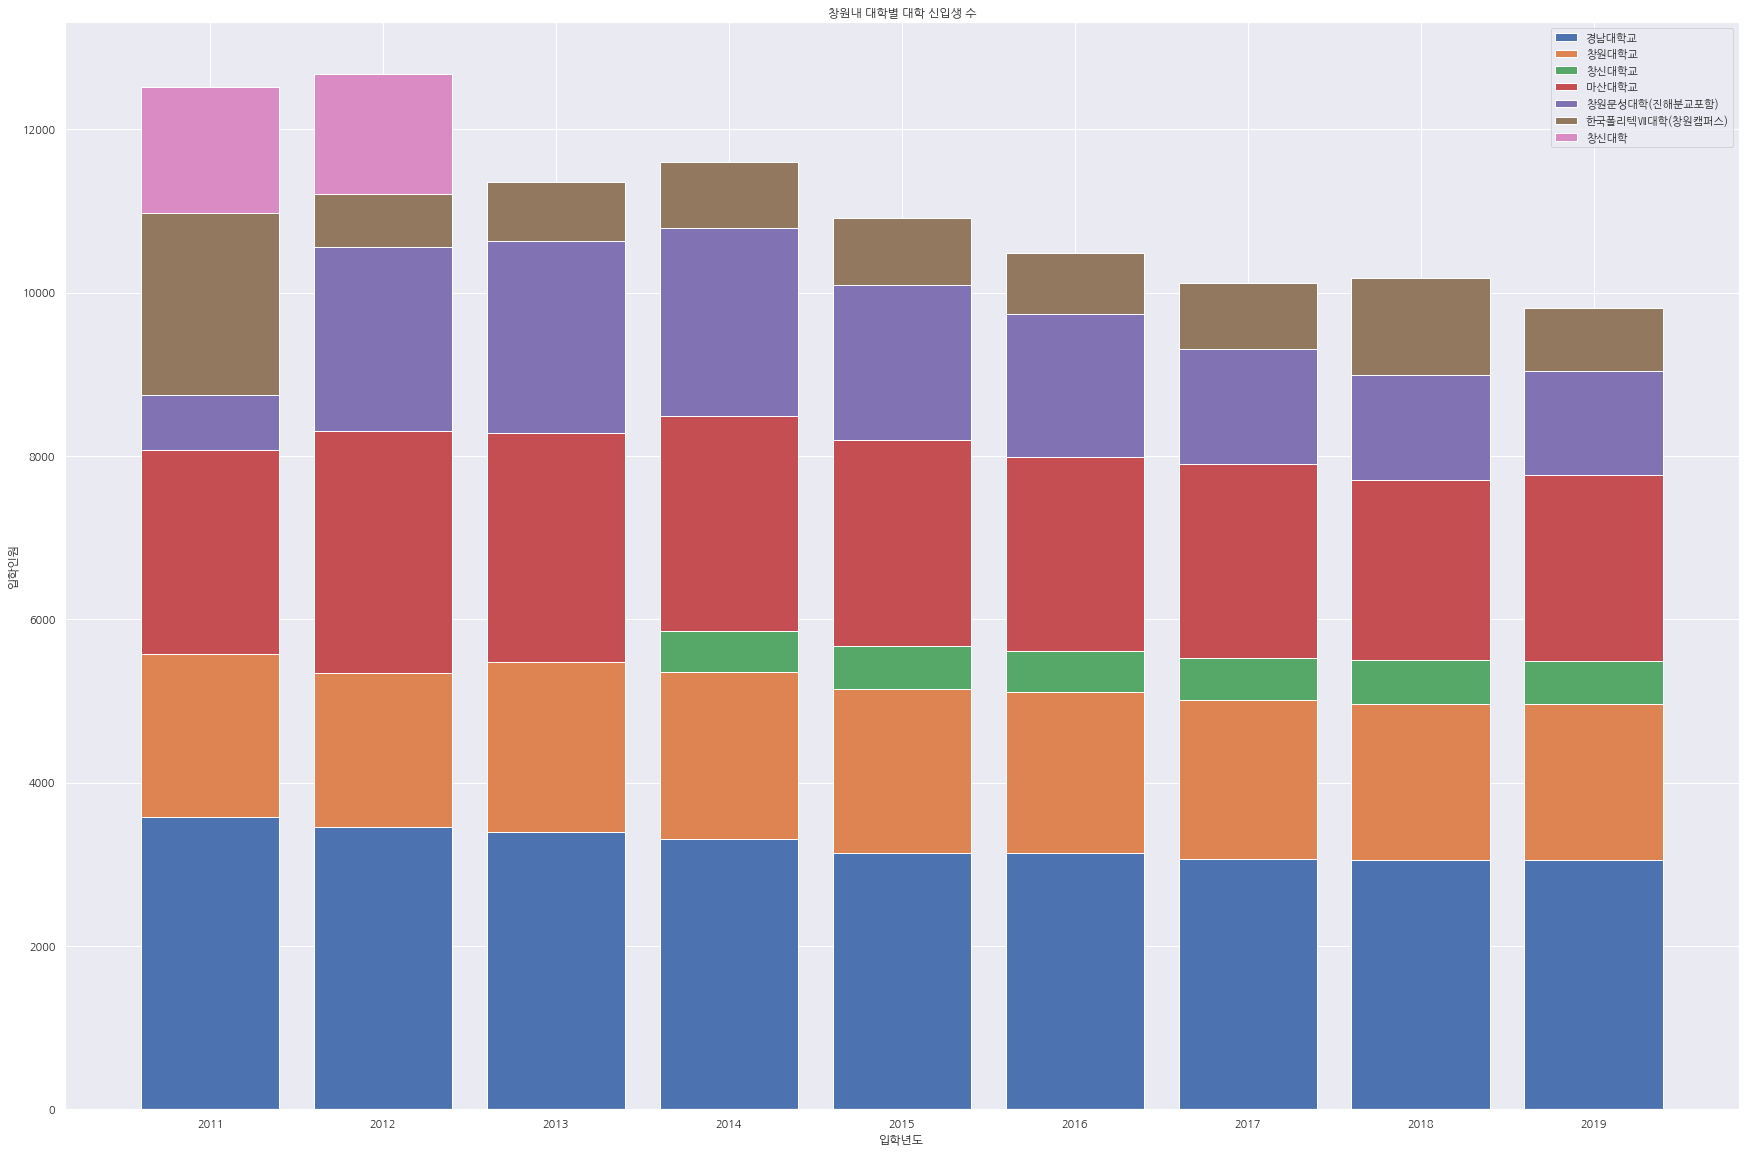

In [51]:
order_lst = ["경남대학교","창원대학교","창신대학교","마산대학교","창원문성대학(진해분교포함)","한국폴리텍Ⅶ대학(창원캠퍼스)","창신대학"]

j = 0
bot = unicp2[order_lst[0]].astype(int) - unicp2[order_lst[0]].astype(int)
plt.figure(figsize = (30,20))

for i in range(0,len(order_lst)):
    print(type(bot))
    plt.bar(unicp2['index'],unicp2[order_lst[i]],label = order_lst[i],bottom = bot)
    bot += unicp2[order_lst[j]].astype(int)
    j += 1
plt.legend()
plt.title("창원내 대학별 대학 신입생 수")
plt.xlabel("입학년도")
plt.ylabel("입학인원")

In [53]:
indca

,행정구역별(1),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,...,2018.32,2018.33,2018.34,2018.35,2018.36,2018.37,2018.38,2018.39,2018.40,2018.41
0,행정구역별(1),합계,합계,합계,합계,농업임업 및 어업,농업임업 및 어업,광업,광업,제조업,...,공공행정국방 및 사회보장행정,공공행정국방 및 사회보장행정,교육서비스업,교육서비스업,보건업 및 사회복지 서비스업,보건업 및 사회복지 서비스업,예술스포츠 및 여가관련 서비스,예술스포츠 및 여가관련 서비스,협회 및 단체수리 및 기타 개인서비스업,협회 및 단체수리 및 기타 개인서비스업
1,행정구역별(1),사업체수 (개),종사자수 (명),남자종사자수 (명),여자종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),...,사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명)
2,합계,73470,407513,246139,161374,12,214,4,30,7797,...,224,13692,4397,30720,2960,38131,2437,7458,9300,18434
3,의창구,19992,100478,60570,39908,7,177,1,3,2318,...,66,7148,983,8174,695,9637,658,2486,2466,4980
4,성산구,14895,144173,100234,43939,2,12,NaN,NaN,2271,...,22,1738,1149,7175,651,7619,506,1454,1729,3834
5,마산합포구,15229,53931,27381,26550,3,25,2,24,1023,...,61,2007,745,5225,540,7679,434,1081,1937,3618
6,마산회원구,13524,65304,33770,31534,NaN,NaN,NaN,NaN,1655,...,33,1588,790,5801,538,7617,434,1240,1771,3609
7,진해구,9830,43627,24184,19443,NaN,NaN,1,3,530,...,42,1211,730,4345,536,5579,405,1197,1397,2393


In [54]:
indca2 = indca.drop(indca.index[3:8])
indca2

,행정구역별(1),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,...,2018.32,2018.33,2018.34,2018.35,2018.36,2018.37,2018.38,2018.39,2018.40,2018.41
0,행정구역별(1),합계,합계,합계,합계,농업임업 및 어업,농업임업 및 어업,광업,광업,제조업,...,공공행정국방 및 사회보장행정,공공행정국방 및 사회보장행정,교육서비스업,교육서비스업,보건업 및 사회복지 서비스업,보건업 및 사회복지 서비스업,예술스포츠 및 여가관련 서비스,예술스포츠 및 여가관련 서비스,협회 및 단체수리 및 기타 개인서비스업,협회 및 단체수리 및 기타 개인서비스업
1,행정구역별(1),사업체수 (개),종사자수 (명),남자종사자수 (명),여자종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),...,사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명)
2,합계,73470,407513,246139,161374,12,214,4,30,7797,...,224,13692,4397,30720,2960,38131,2437,7458,9300,18434


In [75]:
indca3 = indca2.T
indca3 = indca3.reset_index()
indca3

,index,0,1,2
0,행정구역별(1),행정구역별(1),행정구역별(1),합계
1,2011,합계,사업체수 (개),73470
2,2011.1,합계,종사자수 (명),407513
3,2011.2,합계,남자종사자수 (명),246139
4,2011.3,합계,여자종사자수 (명),161374
...,...,...,...,...
328,2018.37,보건업 및 사회복지 서비스업,종사자수 (명),38131
329,2018.38,예술스포츠 및 여가관련 서비스,사업체수 (개),2437
330,2018.39,예술스포츠 및 여가관련 서비스,종사자수 (명),7458
331,2018.40,협회 및 단체수리 및 기타 개인서비스업,사업체수 (개),9300


In [79]:
y_lst = []
for i in indca3["index"]:
    y_lst.append(i[0:4])
indca3["year"] = y_lst
indca3_2011 = indca3[indca3["year"] == "2011"]
indca3_2011_p = indca3_2011[indca3_2011[1] == "종사자수 (명)"]
indca3_2011_p = indca3_2011_p[indca3_2011_p[0] != "합계"]
indca3_2011_p

,index,0,1,2,year
6,2011.5,농업임업 및 어업,종사자수 (명),214,2011
8,2011.7,광업,종사자수 (명),30,2011
10,2011.9,제조업,종사자수 (명),133582,2011
12,2011.11,전기가스증기,종사자수 (명),1096,2011
14,2011.13,하수.폐기물 처리,종사자수 (명),1452,2011
16,2011.15,건설업,종사자수 (명),19559,2011
18,2011.17,도매및소매업,종사자수 (명),50290,2011
20,2011.19,운수업,종사자수 (명),15653,2011
22,2011.21,숙박 및 음식점업,종사자수 (명),43027,2011
24,2011.23,출판영상방송통신 및 정보서비스업,종사자수 (명),4269,2011


([<matplotlib.patches.Wedge at 0x1b76a6c3580>,
 [Text(1.099998503051348, 0.0018147409715038177, '농업임업 및 어업'),
  Text(1.0999931433818984, 0.0038838785782403106, '광업'),
  Text(0.5629302570177318, 0.9450447215523456, '제조업'),
  Text(-0.5283634668437203, 0.9647963758767365, '전기가스증기'),
  Text(-0.5472118131846014, 0.95423227335446, '하수.폐기물 처리'),
  Text(-0.6939382812966162, 0.8534926254813797, '건설업'),
  Text(-1.0334361000786678, 0.3768419125498038, '도매및소매업'),
  Text(-1.0861767082122897, -0.1738394619673991, '운수업'),
  Text(-0.9009341780633549, -0.6311240819342164, '숙박 및 음식점업'),
  Text(-0.6166567813266073, -0.9108975870227722, '출판영상방송통신 및 정보서비스업'),
  Text(-0.4787489416632335, -0.99035319500486, '금융 및 보험업'),
  Text(-0.29440435416744515, -1.0598707828066825, '부동산업 및 임대업'),
  Text(-0.12828700664890805, -1.0924936814119628, '전문과학 및 기술 서비스업'),
  Text(0.081787058693843, -1.0969552757657033, '사업시설관리 및 사업지원 서비스업'),
  Text(0.2967648481040643, -1.0592122662289045, '공공행정국방 및 사회보장행정'),
  Text(0.616811164692

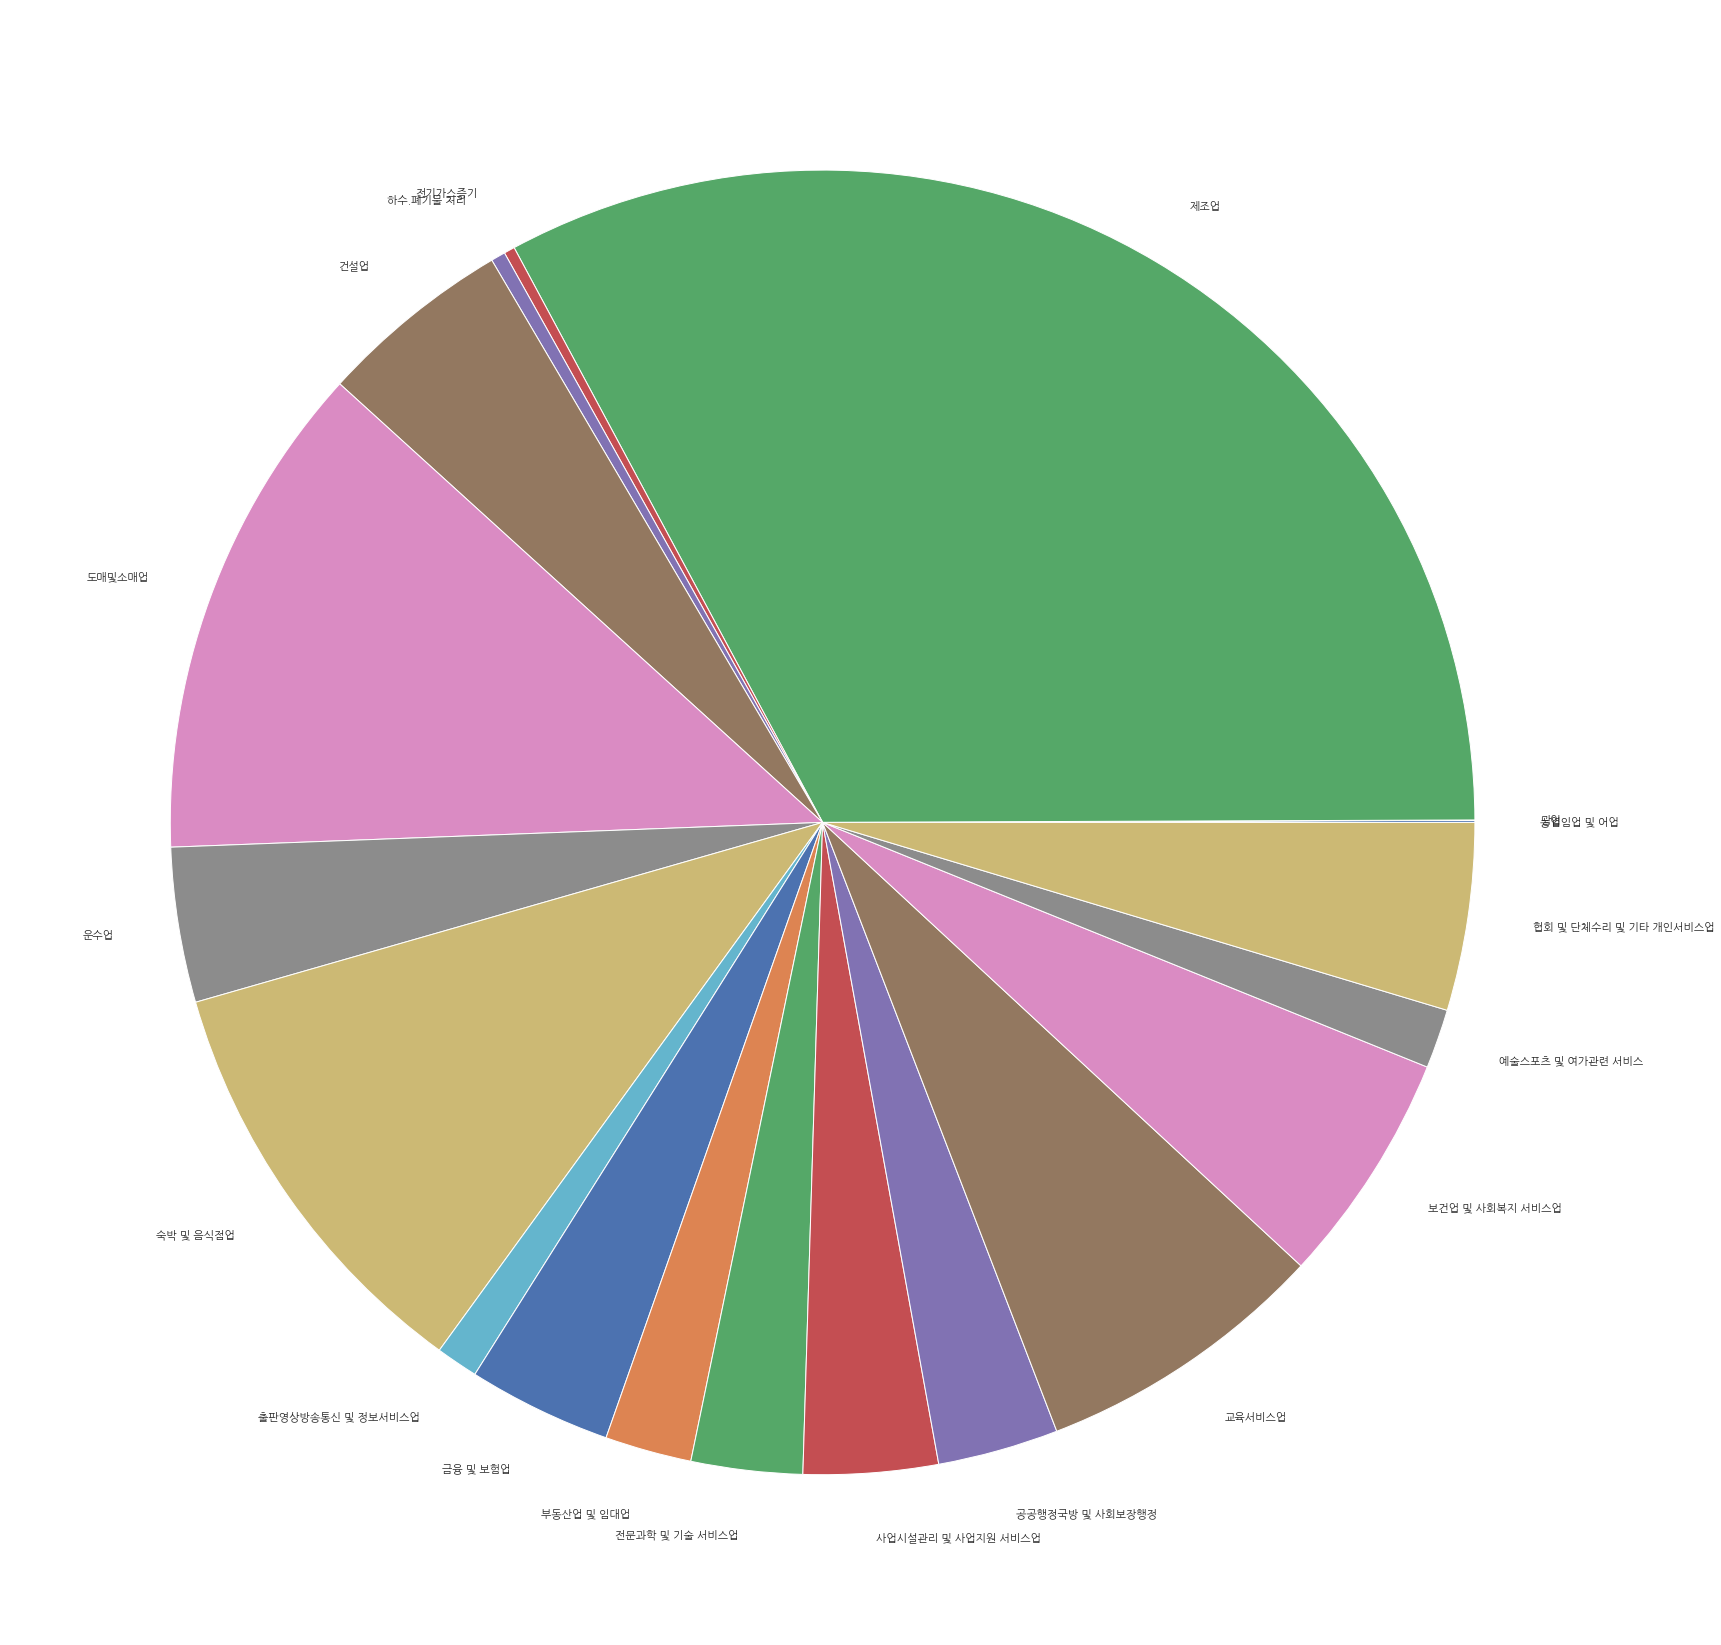

In [84]:
plt.figure(figsize = (30,30))
plt.pie(indca3_2011_p[2],labels = indca3_2011_p[0])

In [108]:
indma = pd.read_csv("c://python//사업체_현황_창원.csv",encoding='cp949')
indmb = pd.read_csv("c://python//사업체_현황_창원_제조외.csv",encoding='cp949')
indma

,특성별(1),특성별(2),2018,2018.1,2018.2
0,특성별(1),특성별(2),사업체수 (개),종사자수 (명),매출액 (십억원)
1,업종별,소비재 및 소재관련 제조,2133,12954,8481
2,업종별,비금속광물/금속,2960,40822,17482
3,업종별,전자/의료/전기/기계,3455,75732,45059
4,업종별,자동차/가구/기타제품/수리업,1580,29756,23136


In [109]:
indm = pd.concat([indma,indmb])
indm

,특성별(1),특성별(2),2018,2018.1,2018.2
0,특성별(1),특성별(2),사업체수 (개),종사자수 (명),매출액 (십억원)
1,업종별,소비재 및 소재관련 제조,2133,12954,8481
2,업종별,비금속광물/금속,2960,40822,17482
3,업종별,전자/의료/전기/기계,3455,75732,45059
4,업종별,자동차/가구/기타제품/수리업,1580,29756,23136
0,특성별(1),특성별(2),사업체수 (개),종사자수 (명),매출액 (십억원)
1,업종별,도소매업,20769,69347,20585
2,업종별,음식숙박업,17820,52504,3760
3,업종별,전기/하수/건설/운수,4321,54443,12396
4,업종별,정보통신/금융보험/부동산,2918,36072,8579


In [110]:
indm.columns = ["특성별(1)","특성별(2)","사업체수 (개)","종사자수 (명)","매출액 (십억원)"]
indm = indm.drop(indm.index[0])
indm

,특성별(1),특성별(2),사업체수 (개),종사자수 (명),매출액 (십억원)
1,업종별,소비재 및 소재관련 제조,2133,12954,8481
2,업종별,비금속광물/금속,2960,40822,17482
3,업종별,전자/의료/전기/기계,3455,75732,45059
4,업종별,자동차/가구/기타제품/수리업,1580,29756,23136
1,업종별,도소매업,20769,69347,20585
2,업종별,음식숙박업,17820,52504,3760
3,업종별,전기/하수/건설/운수,4321,54443,12396
4,업종별,정보통신/금융보험/부동산,2918,36072,8579
5,업종별,전문과학/사업지원/임대업,3082,36649,8369
6,업종별,교육/보건사회복지,6774,52777,3434


In [111]:
indm = indm.drop(columns = "특성별(1)")
indm

,특성별(2),사업체수 (개),종사자수 (명),매출액 (십억원)
1,소비재 및 소재관련 제조,2133,12954,8481
2,비금속광물/금속,2960,40822,17482
3,전자/의료/전기/기계,3455,75732,45059
4,자동차/가구/기타제품/수리업,1580,29756,23136
1,도소매업,20769,69347,20585
2,음식숙박업,17820,52504,3760
3,전기/하수/건설/운수,4321,54443,12396
4,정보통신/금융보험/부동산,2918,36072,8579
5,전문과학/사업지원/임대업,3082,36649,8369
6,교육/보건사회복지,6774,52777,3434


Text(0, 0.5, '매출액 (십억원)')

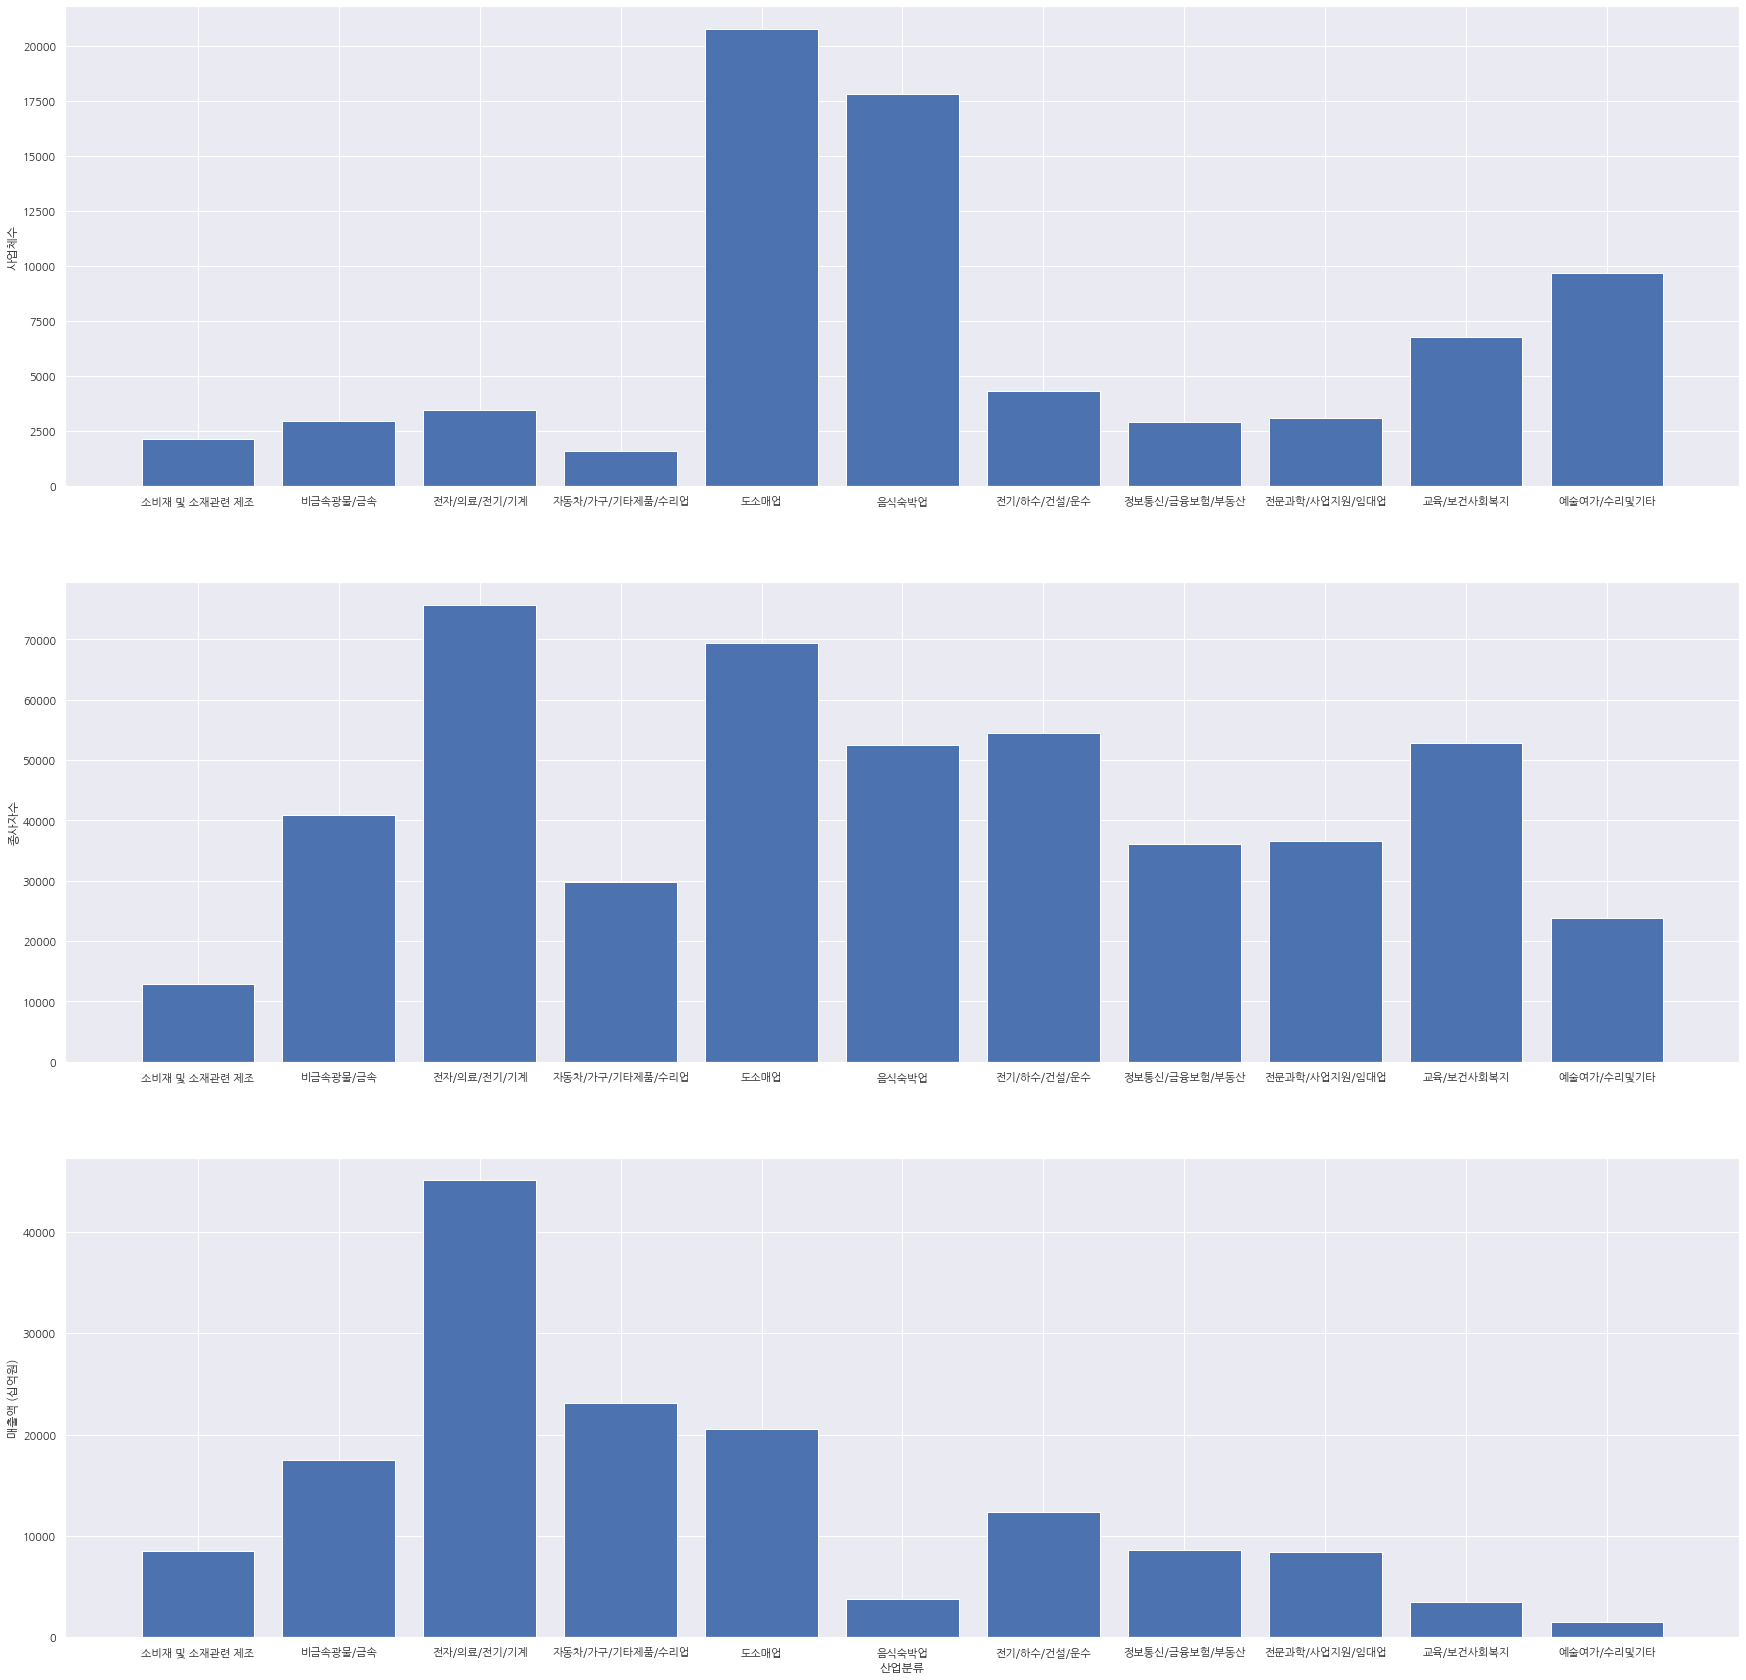

In [117]:
plt.figure(figsize = (30,30))
plt.title("창원 산업별 개수(상), 종사자수(중), 매출액(하)")

plt.subplot(3,1,1)
plt.bar(indm["특성별(2)"],indm["사업체수 (개)"].astype(int))
plt.ylabel("사업체수")

plt.subplot(3,1,2)
plt.bar(indm["특성별(2)"],indm["종사자수 (명)"].astype(int))
plt.ylabel("종사자수")

plt.subplot(3,1,3)
plt.bar(indm["특성별(2)"],indm["매출액 (십억원)"].astype(int))
plt.xlabel("산업분류")
plt.ylabel("매출액 (십억원)")